<a href="https://colab.research.google.com/github/ImamSyabana/kenkyushimasu_Nikkei225/blob/main/multivariate_Cleaned_Nikkei225_daily_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Roadmap penelitian

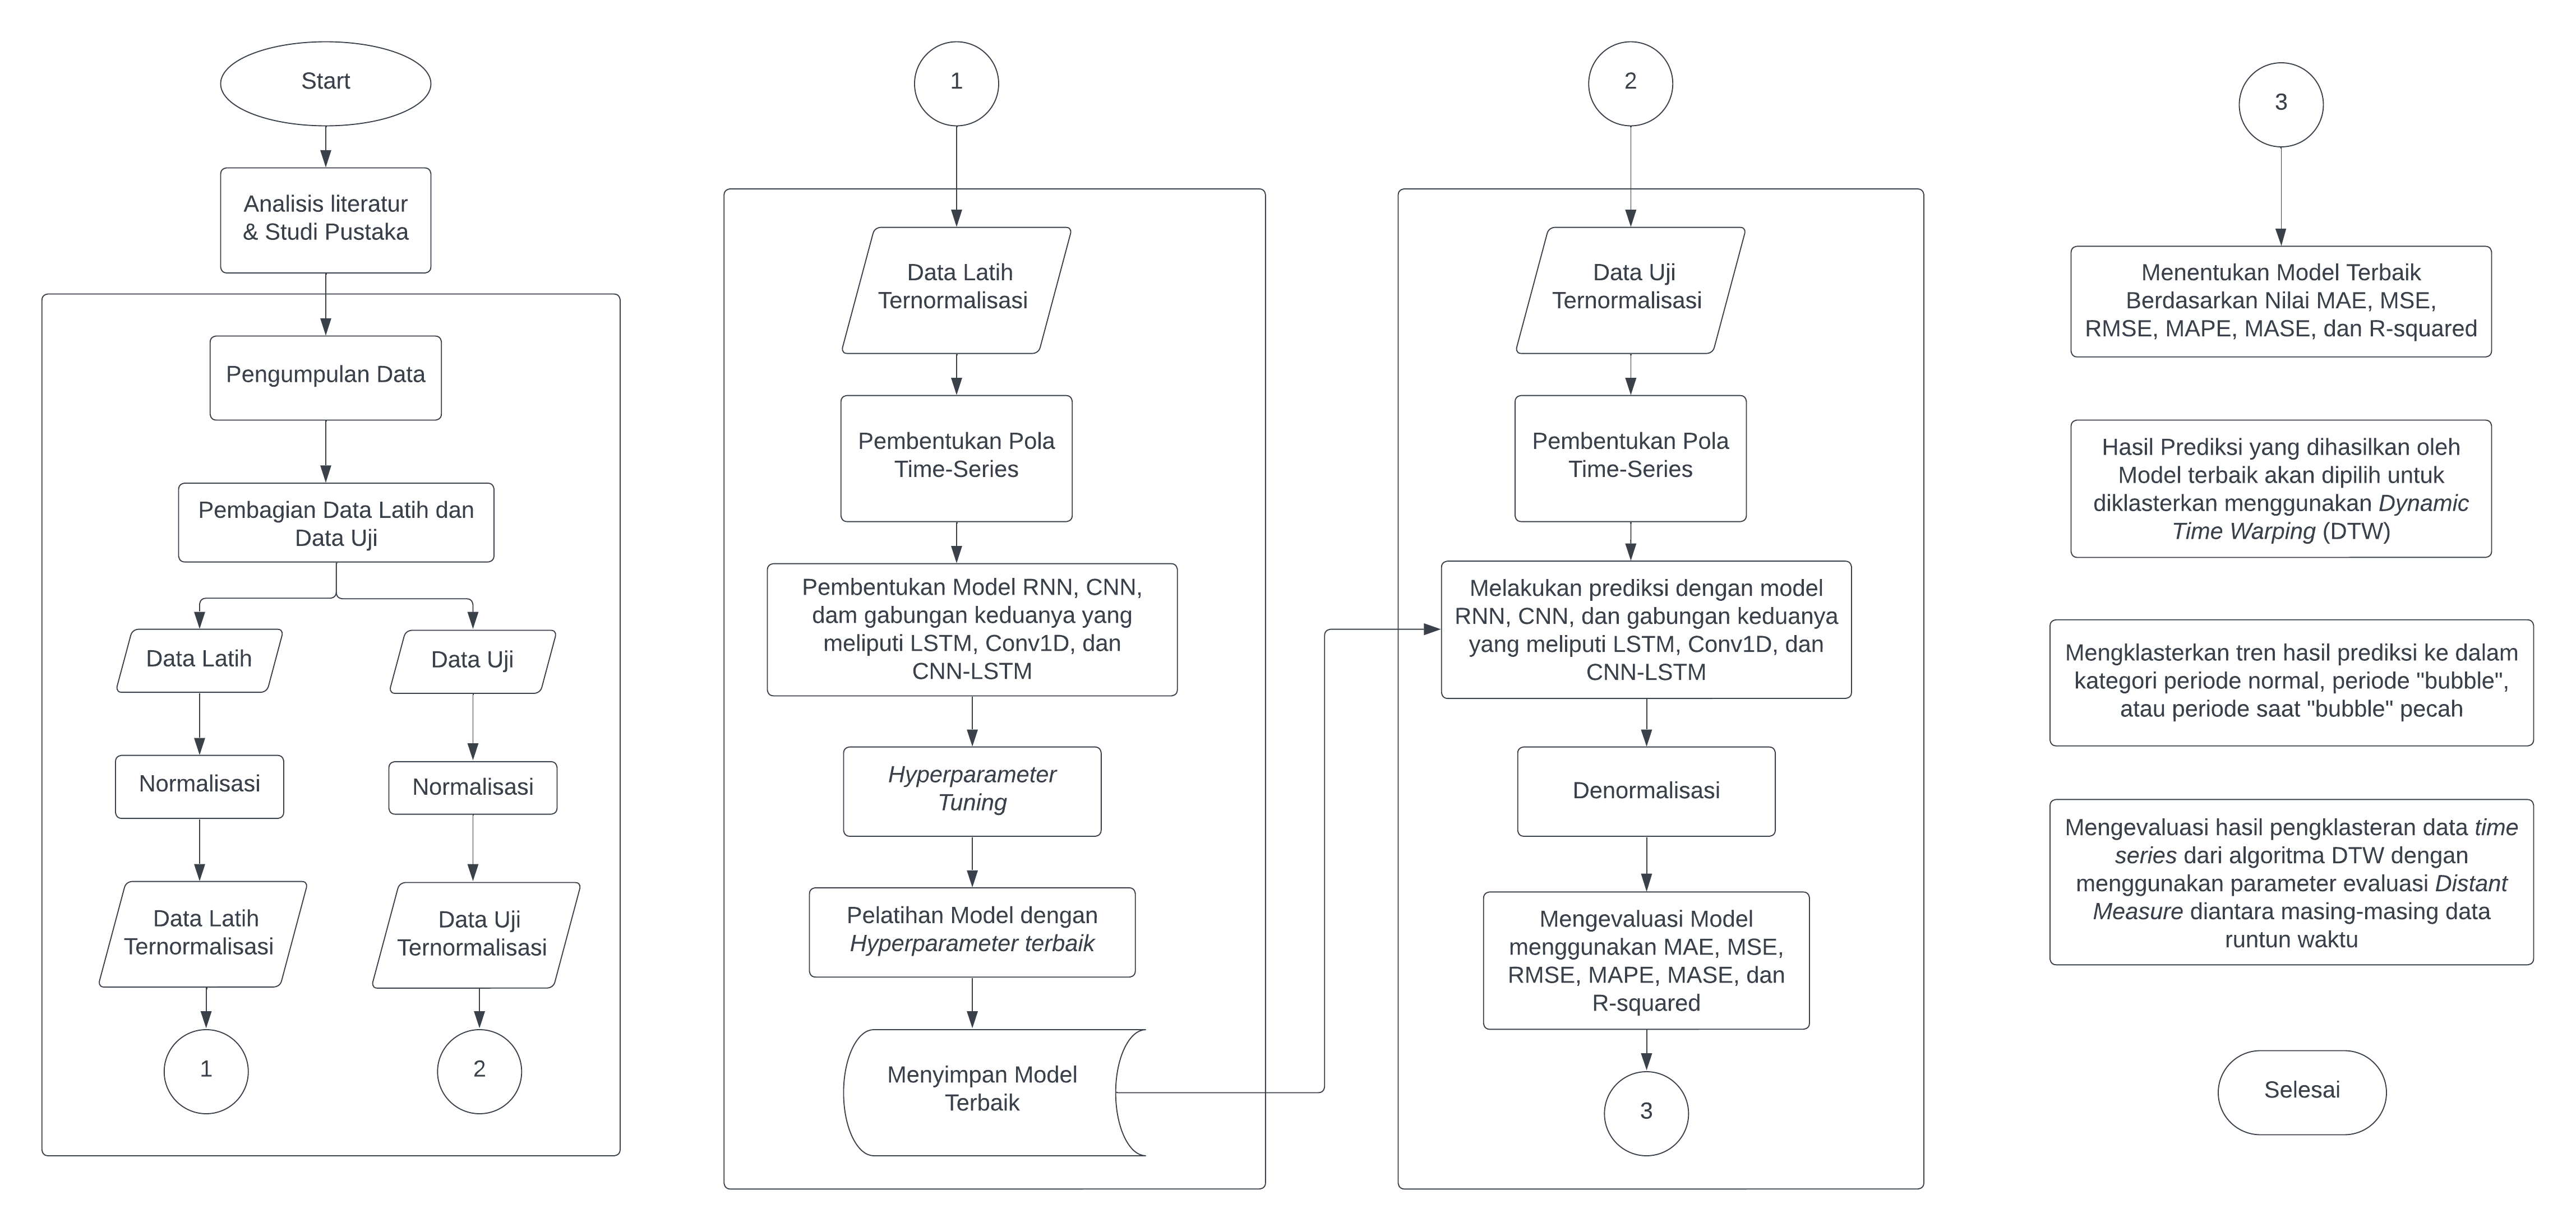

# Konek Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Get Data

Sumber data: https://indexes.nikkei.co.jp/en/nkave/archives/data?list=daily


mendownload data harga saham Nikkei225 dengan interval harian dari tahun 1968 sampai 2023

In [ ]:
!wget https://raw.githubusercontent.com/ImamSyabana/kenkyushimasu_Nikkei225/main/datasets/nikkei225/Nikkei225_daily.csv


--2024-03-04 18:28:13--  https://raw.githubusercontent.com/ImamSyabana/kenkyushimasu_Nikkei225/main/datasets/nikkei225/Nikkei225_daily.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 734035 (717K) [text/plain]
Saving to: ‘Nikkei225_daily.csv’

Nikkei225_daily.csv 100%[===================>] 716.83K  --.-KB/s    in 0.04s   

2024-03-04 18:28:13 (15.6 MB/s) - ‘Nikkei225_daily.csv’ saved [734035/734035]



## Import data time series dengan pandas

In [ ]:
# import dengan pandas
import pandas as pd

# konversi format nilai
def convert_value(value):
    # Check if the value is not NaN and not '-'
    if value != '-':
        # Remove commas and convert to float
        return float(value.replace(',', ''))
    else:
        return None

# membaca data saham Nikkei225
nikkei225_df = pd.read_csv("/content/Nikkei225_daily.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"],
                           converters = {'Open': convert_value,
                                         'High': convert_value,
                                         'Low': convert_value,
                                         'Close': convert_value})
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

nikkei225_df.tail()

Open      High       Low     Close
Date                                              
2023-12-25  33414.51  33414.51  33221.57  33254.03
2023-12-26  33295.68  33312.26  33181.36  33305.85
2023-12-27  33532.97  33755.75  33521.52  33681.24
2023-12-28  33477.47  33571.73  33411.24  33539.62
2023-12-29  33458.64  33652.71  33305.17  33464.17

In [ ]:
nikkei225_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14628 entries, 1968-01-04 to 2023-12-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    9647 non-null   float64
 1   High    9647 non-null   float64
 2   Low     9647 non-null   float64
 3   Close   14628 non-null  float64
dtypes: float64(4)
memory usage: 571.4 KB


data saham hanya digunakan saat harga close

In [ ]:
nikkei225_close_df = pd.DataFrame(nikkei225_df["Close"]).rename(columns={"Close": "Closing Price (Yen)"})
nikkei225_close_df.tail()


Closing Price (Yen)
Date                           
2023-12-25             33254.03
2023-12-26             33305.85
2023-12-27             33681.24
2023-12-28             33539.62
2023-12-29             33464.17

Informasi jumlah data

In [ ]:
len(nikkei225_df)

14628

menampilkan missing data

In [ ]:
# List the rows where the 'Close' column is nullC
rows_with_null_close = nikkei225_close_df[nikkei225_close_df['Closing Price (Yen)'].isnull()]
print(rows_with_null_close)

Empty DataFrame
Columns: [Closing Price (Yen)]
Index: []


In [ ]:

nikkei225_close_df.isnull().sum()

Closing Price (Yen)    0
dtype: int64

# Bagian membuat multivariate time series dataset.

selain menggunakan data nikkei225, perdiksi harga saham akan dibantu dengan data discount rate dan money supply

multivariate time series akan menambahkan fitur lebih banyak dari univariate time series yang hanya satu fitur

import file csv





In [ ]:
!wget https://raw.githubusercontent.com/ImamSyabana/kenkyushimasu_Nikkei225/main/datasets/dicountRate/discountRate.csv

--2024-03-04 18:28:14--  https://raw.githubusercontent.com/ImamSyabana/kenkyushimasu_Nikkei225/main/datasets/dicountRate/discountRate.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8741 (8.5K) [text/plain]
Saving to: ‘discountRate.csv’

discountRate.csv    100%[===================>]   8.54K  --.-KB/s    in 0s      

2024-03-04 18:28:15 (77.0 MB/s) - ‘discountRate.csv’ saved [8741/8741]



In [ ]:
!wget https://raw.githubusercontent.com/ImamSyabana/kenkyushimasu_Nikkei225/main/datasets/moneyStock/moneyStock.csv

--2024-03-04 18:28:15--  https://raw.githubusercontent.com/ImamSyabana/kenkyushimasu_Nikkei225/main/datasets/moneyStock/moneyStock.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8817 (8.6K) [text/plain]
Saving to: ‘moneyStock.csv’

moneyStock.csv      100%[===================>]   8.61K  --.-KB/s    in 0s      

2024-03-04 18:28:15 (82.7 MB/s) - ‘moneyStock.csv’ saved [8817/8817]



# Import data time seres tambahan: discount rate dan money supply

import data discount rate

In [ ]:
# import dengan pandas
import pandas as pd
# membaca data discount rate
discRate_df = pd.read_csv("/content/discountRate.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"])
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

discRate_df[:3]

discRate
Date                
1968-01-01      6.21
1968-02-01      6.21
1968-03-01      6.21

In [ ]:
len(discRate_df)

672

menampilkan missing data

In [ ]:
print(discRate_df.isnull().sum())

discRate    0
dtype: int64


import data discount rate dengan modul csv.reader

In [ ]:
# import dan format historikal data dengan python

import csv
from datetime import datetime

timesteps_discountRate = []
discountRate_value = []

with open("/content/discountRate.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader) #untuk tidak membaca baris pertama berisi judul kolom
  for line in csv_reader:
    if line[1] == "null":
      continue
    timesteps_discountRate.append(datetime.strptime(line[0], "%Y/%m")) #membaca tanggal sbg DATE
    discountRate_value.append(float(line[1])) #membaca nilai discount rate


In [ ]:
timesteps_discountRate[:3], discountRate_value[:3]

([datetime.datetime(1968, 1, 1, 0, 0),
  datetime.datetime(1968, 2, 1, 0, 0),
  datetime.datetime(1968, 3, 1, 0, 0)],
 [6.21, 6.21, 6.21])

In [ ]:
len(discountRate_value)

672

import data money supply menjadi dataframe

In [ ]:
# import dengan pandas
import pandas as pd
# membaca data money supply
moneySupply_df = pd.read_csv("/content/moneyStock.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"])
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

moneySupply_df[:3]

moneyStock
Date                  
1968-01-01        15.7
1968-02-01        15.8
1968-03-01        15.3

In [ ]:
len(moneySupply_df)

672

menampilkan missing data

In [ ]:
print(moneySupply_df.isnull().sum())

moneyStock    0
dtype: int64


import data money supply (M2)

In [ ]:
# import dan format historikal data dengan python

timesteps_moneyStock = []
moneyStock_value = []

with open("/content/moneyStock.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader) #untuk tidak membaca baris pertama berisi judul kolom
  for line in csv_reader:
    if line[1] == "null":
      continue
    timesteps_moneyStock.append(datetime.strptime(line[0], "%Y/%m")) #membaca tanggal sbg DATE
    moneyStock_value.append(float(line[1])) #membaca nilai moneyStock


In [ ]:
timesteps_moneyStock[:3], moneyStock_value[:3]

([datetime.datetime(1968, 1, 1, 0, 0),
  datetime.datetime(1968, 2, 1, 0, 0),
  datetime.datetime(1968, 3, 1, 0, 0)],
 [15.7, 15.8, 15.3])

In [ ]:
type(timesteps_moneyStock), type(moneyStock_value)

(list, list)

In [ ]:
len(moneyStock_value)

672

# Mengumpulkan data menjadi satu dataframe

In [ ]:
# membuat dataframe untuk mengumpulkan semua data multivariate

# copy dataframe nikkei yang masih hanya berisi harga saham
nikkei225_close_multivariate_df = nikkei225_close_df.copy()

# menambahkan kolom money stock dan dsicount rate
nikkei225_close_multivariate_df["money_stock"] = None
nikkei225_close_multivariate_df["discount_rate"] = None
nikkei225_close_multivariate_df

Closing Price (Yen) money_stock discount_rate
Date                                                     
1968-01-04              1266.27        None          None
1968-01-05              1282.38        None          None
1968-01-06              1280.78        None          None
1968-01-08              1283.53        None          None
1968-01-09              1305.94        None          None
...                         ...         ...           ...
2023-12-25             33254.03        None          None
2023-12-26             33305.85        None          None
2023-12-27             33681.24        None          None
2023-12-28             33539.62        None          None
2023-12-29             33464.17        None          None

[14628 rows x 3 columns]

menggabungkan data discount rate dan money supply ke dataframe Nikkei225 closing price

In [ ]:
for x in range(len(timesteps_discountRate)):
  for y in range(len(nikkei225_close_multivariate_df.index)):
    IntervalBulan_timesteps_atrYEAR = timesteps_discountRate[x].year
    IntervalBulan_timesteps_atrMONTH = timesteps_discountRate[x].month
    IntervalBulan_timesteps_atrDAY = timesteps_discountRate[x].day

    IntervalHarian_timesteps_atrYEAR = nikkei225_close_multivariate_df.index[y].year
    IntervalHarian_timesteps_atrMONTH = nikkei225_close_multivariate_df.index[y].month
    IntervalHarian_timesteps_atrDAY = nikkei225_close_multivariate_df.index[y].day

    if IntervalBulan_timesteps_atrYEAR == IntervalHarian_timesteps_atrYEAR and IntervalBulan_timesteps_atrMONTH == IntervalHarian_timesteps_atrMONTH:
      string_tanggal = "{tahun}-{bulan}-{tanggal}".format(tahun = IntervalHarian_timesteps_atrYEAR, bulan = IntervalHarian_timesteps_atrMONTH, tanggal = IntervalHarian_timesteps_atrDAY)
      date_to_index = pd.to_datetime(string_tanggal)
      nikkei225_close_multivariate_df.loc[date_to_index, "money_stock"] = moneyStock_value[x]
      nikkei225_close_multivariate_df.loc[date_to_index, "discount_rate"] = discountRate_value[x]

In [ ]:
moneySupply_df[:3], discRate_df[:3]

(            moneyStock
 Date                  
 1968-01-01        15.7
 1968-02-01        15.8
 1968-03-01        15.3,
             discRate
 Date                
 1968-01-01      6.21
 1968-02-01      6.21
 1968-03-01      6.21)

In [ ]:
nikkei225_close_multivariate_df[:30]

Closing Price (Yen) money_stock discount_rate
Date                                                     
1968-01-04              1266.27        15.7          6.21
1968-01-05              1282.38        15.7          6.21
1968-01-06              1280.78        15.7          6.21
1968-01-08              1283.53        15.7          6.21
1968-01-09              1305.94        15.7          6.21
1968-01-10              1303.11        15.7          6.21
1968-01-11              1316.89        15.7          6.21
1968-01-12              1314.47        15.7          6.21
1968-01-13              1318.46        15.7          6.21
1968-01-16              1314.98        15.7          6.21
1968-01-17              1319.98        15.7          6.21
1968-01-18              1322.99        15.7          6.21
1968-01-19              1312.74        15.7          6.21
1968-01-20              1315.41        15.7          6.21
1968-01-22              1306.49        15.7          6.21
1968-01-23              1307.55        15.7          6.21
1968-01-24              1304.45        15.7          6.21
1968-01-25              1305.23        15.7          6.21
1968-01-26              1313.18        15.7          6.21
1968-01-27              1310.00        15.7          6.21
1968-01-29              1306.61        15.7          6.21
1968-01-30              1306.67        15.7          6.21
1968-01-31              1312.20        15.7          6.21
1968-02-01              1311.71        15.8          6.21
1968-02-02              1318.11        15.8          6.21
1968-02-03              1315.86        15.8          6.21
1968-02-05              1320.58        15.8          6.21
1968-02-06              1329.36        15.8          6.21
1968-02-07              1331.77        15.8          6.21
1968-02-08              1329.02        15.8          6.21

In [ ]:
type(nikkei225_close_multivariate_df.index.tolist())

list

# Visualisasi data : Membuat fungsi untuk visualisasi (plotting)


In [ ]:
# membuat fungsi untuk menggambar data time series

import matplotlib.pyplot as plt

def plot_time_series(timesteps, values, format= ".", start = 0, end =None, label = None, color = None):
  """
  Plots timesteps (a series of points in time) against values (a series  of values across timesteps).

  Parameters
  -------------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None
  """
  plt.plot(timesteps[start:end], values[start:end], format, label=label, color = color)
  plt.xlabel("Time")
  plt.ylabel("Saham Nikkei225 Penutupan (mingguan)")
  if label:
    plt.legend(fontsize = 14) #make label bigger
  plt.grid(True)


Visualisasi data saham nikkei225

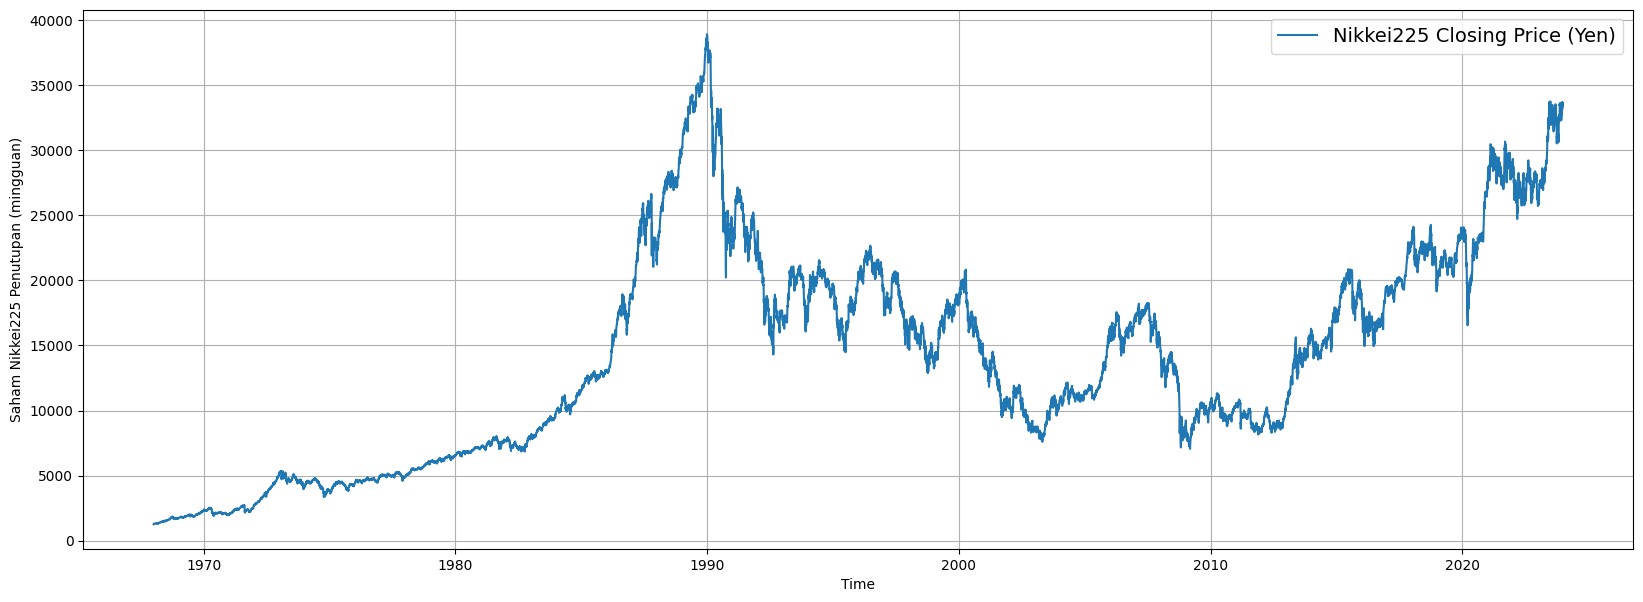

In [ ]:

plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['Closing Price (Yen)'].tolist(), format = "-", label = "Nikkei225 Closing Price (Yen)")


Visualisasi data discount rate

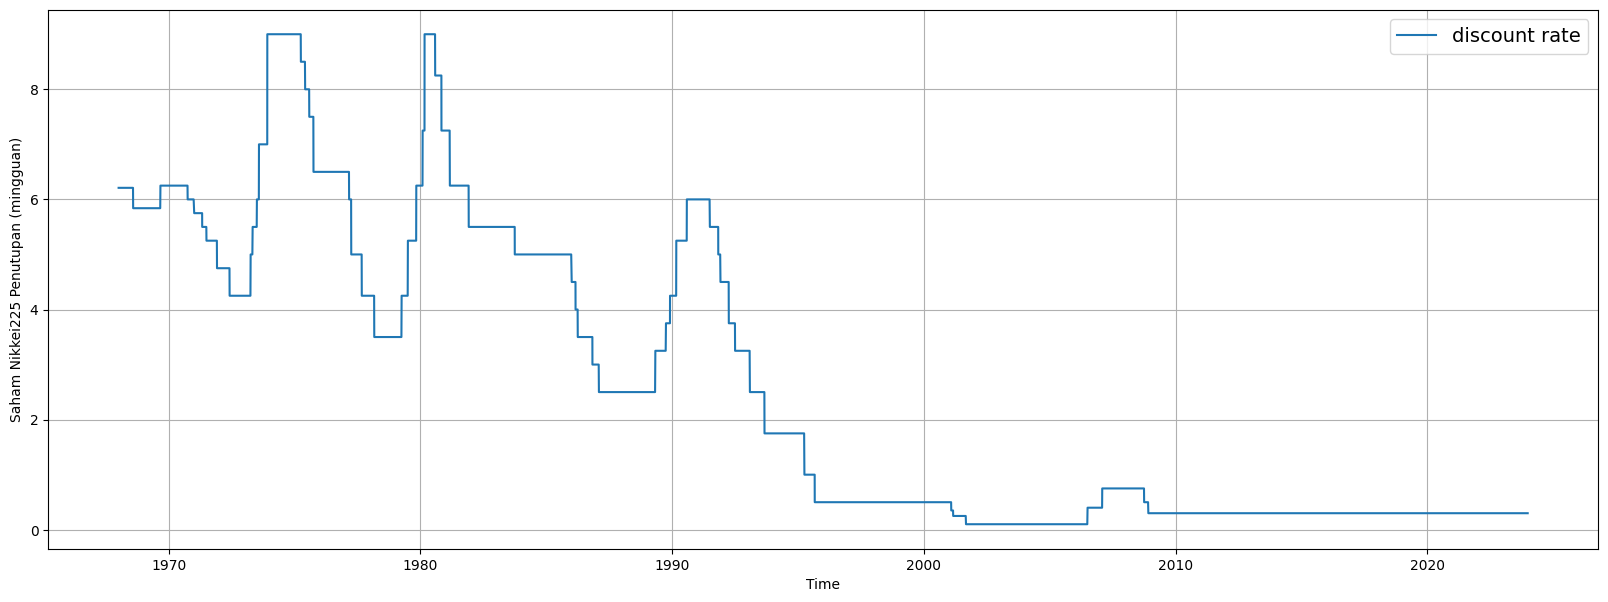

In [ ]:

plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['discount_rate'].tolist(), format = "-", label = "discount rate")


Visualisasi data money supply

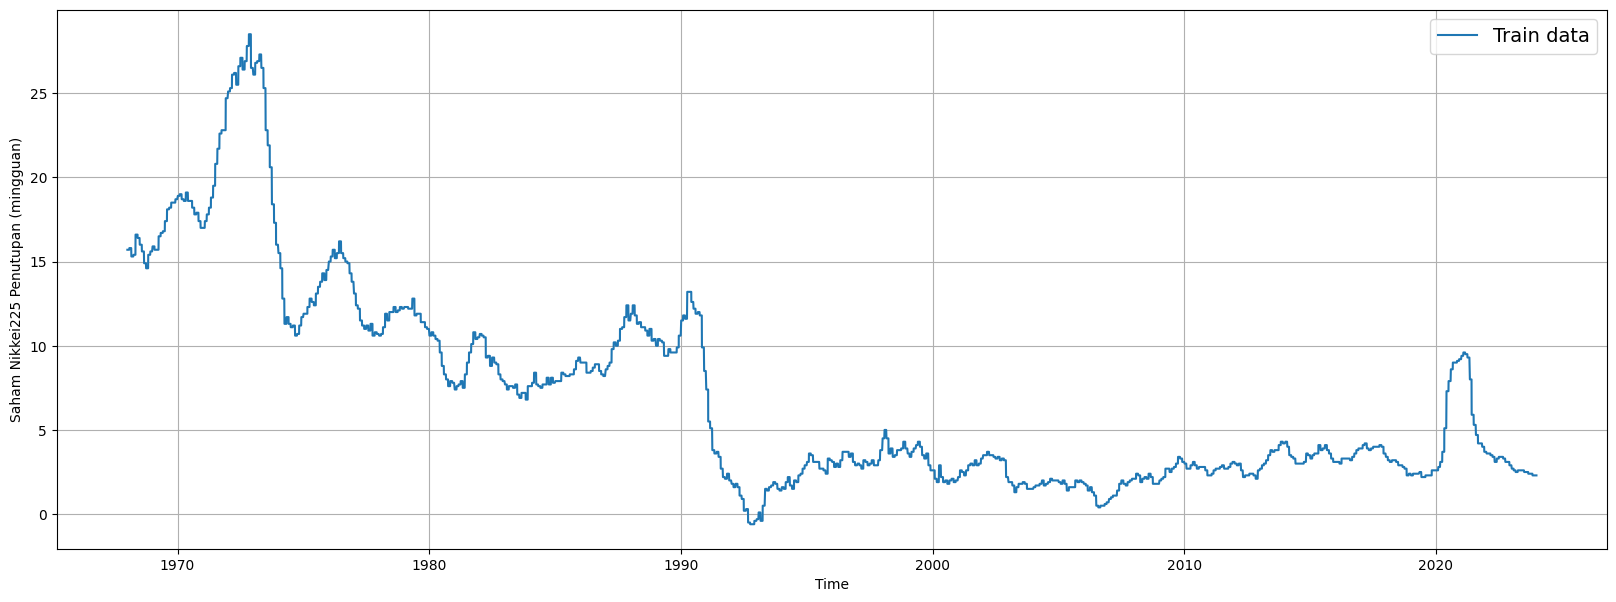

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['money_stock'].tolist(), format = "-", label = "Train data")


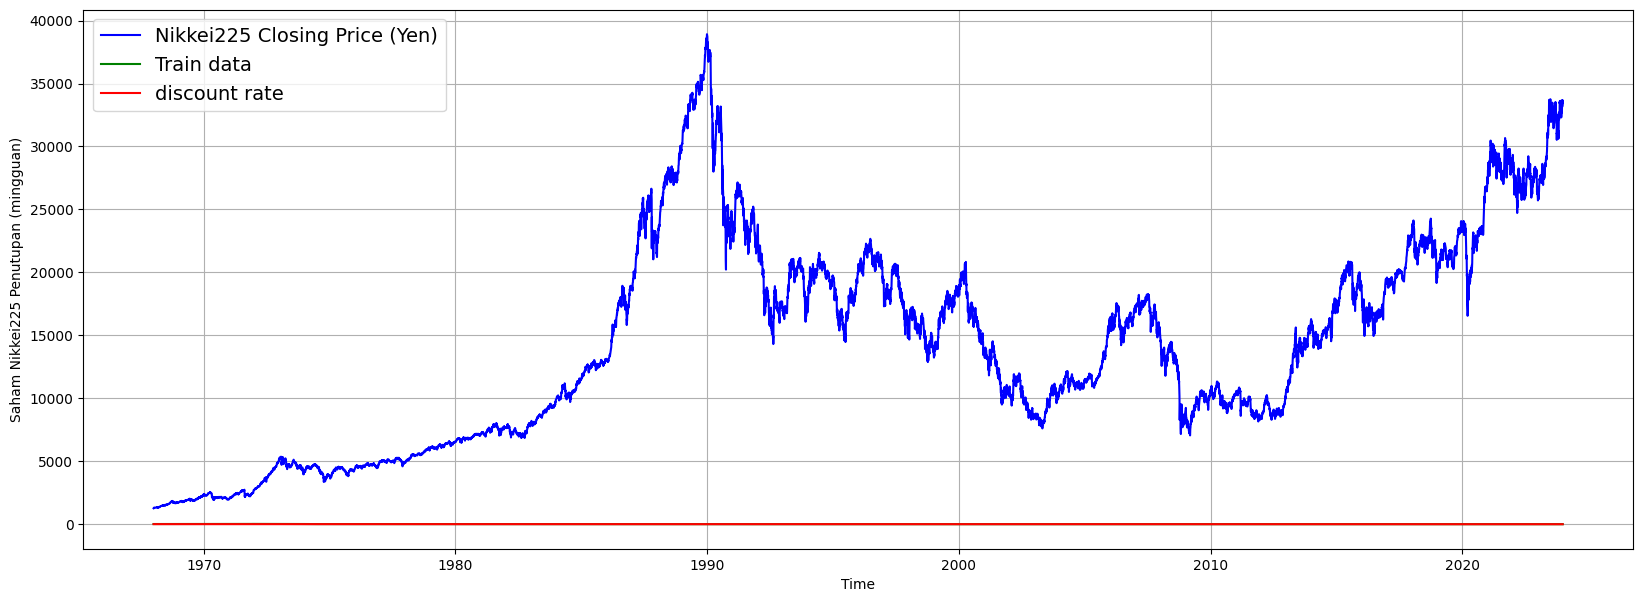

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['Closing Price (Yen)'].tolist(), format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['money_stock'].tolist(), format = "-", label = "Train data", color ='g')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['discount_rate'].tolist(), format = "-", label = "discount rate", color = 'r')


# Melakukan normalisasi dataset

In [ ]:
# Langkah 1 : konversi setiap fitur menjadi 2D-array dengan konfigurasi : (jumlah sample, 1)


In [ ]:

from sklearn.preprocessing import MinMaxScaler

# meinputkan data ke MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(nikkei225_close_multivariate_df)

MinMaxScaler()

In [ ]:
# Melakukan normalization
scaler.transform(nikkei225_close_multivariate_df)

array([[0.00000000e+00, 5.60137457e-01, 6.86516854e-01],
       [4.27892992e-04, 5.60137457e-01, 6.86516854e-01],
       [3.85395861e-04, 5.60137457e-01, 6.86516854e-01],
       ...,
       [8.60964526e-01, 9.96563574e-02, 2.24719101e-02],
       [8.57202998e-01, 9.96563574e-02, 2.24719101e-02],
       [8.55198993e-01, 9.96563574e-02, 2.24719101e-02]])

membuat dataframe dengan nilai normalized

In [ ]:
normalized_data  = scaler.transform(nikkei225_close_multivariate_df)
normalized_data


array([[0.00000000e+00, 5.60137457e-01, 6.86516854e-01],
       [4.27892992e-04, 5.60137457e-01, 6.86516854e-01],
       [3.85395861e-04, 5.60137457e-01, 6.86516854e-01],
       ...,
       [8.60964526e-01, 9.96563574e-02, 2.24719101e-02],
       [8.57202998e-01, 9.96563574e-02, 2.24719101e-02],
       [8.55198993e-01, 9.96563574e-02, 2.24719101e-02]])

In [ ]:
print ("dataset_normalized.shape" , normalized_data.shape)

dataset_normalized.shape (14628, 3)


In [ ]:
normalized_data[:,0].reshape(-1, 1)

array([[0.00000000e+00],
       [4.27892992e-04],
       [3.85395861e-04],
       ...,
       [8.60964526e-01],
       [8.57202998e-01],
       [8.55198993e-01]])

In [ ]:
type(normalized_data[:,0].reshape(-1, 1))

numpy.ndarray

In [ ]:
# konversi array menjadi bentuk dataframe
scaled_nikkei225_close_multivariate_df  = pd.DataFrame(normalized_data, columns=nikkei225_close_multivariate_df.columns)


In [ ]:
scaled_nikkei225_close_multivariate_df

Closing Price (Yen)  money_stock  discount_rate
0                 0.000000     0.560137       0.686517
1                 0.000428     0.560137       0.686517
2                 0.000385     0.560137       0.686517
3                 0.000458     0.560137       0.686517
4                 0.001054     0.560137       0.686517
...                    ...          ...            ...
14623             0.849618     0.099656       0.022472
14624             0.850994     0.099656       0.022472
14625             0.860965     0.099656       0.022472
14626             0.857203     0.099656       0.022472
14627             0.855199     0.099656       0.022472

[14628 rows x 3 columns]

LAtihan denormalisasi

In [ ]:

# # Fit the scaler to your data
# scaler = MinMaxScaler()
# scaler.fit(nikkei225_close_multivariate_df[['discount_rate']])

# # Perform inverse normalization
# inverse_normalized_data = scaler.inverse_transform(scaled_nikkei225_close_multivariate_df[:, 2].reshape(-1, 1))

# print(inverse_normalized_data)

In [ ]:
len(scaler.transform(nikkei225_close_multivariate_df ))

14628

In [ ]:
scaler.transform(nikkei225_close_multivariate_df )[:,0].reshape(-1, 1)

array([[0.00000000e+00],
       [4.27892992e-04],
       [3.85395861e-04],
       ...,
       [8.60964526e-01],
       [8.57202998e-01],
       [8.55198993e-01]])

Visualisasi data yang di normalisasi

In [ ]:
scaled_nikkei225_close_multivariate_df["money_stock"]

0        0.560137
1        0.560137
2        0.560137
3        0.560137
4        0.560137
           ...   
14623    0.099656
14624    0.099656
14625    0.099656
14626    0.099656
14627    0.099656
Name: money_stock, Length: 14628, dtype: float64

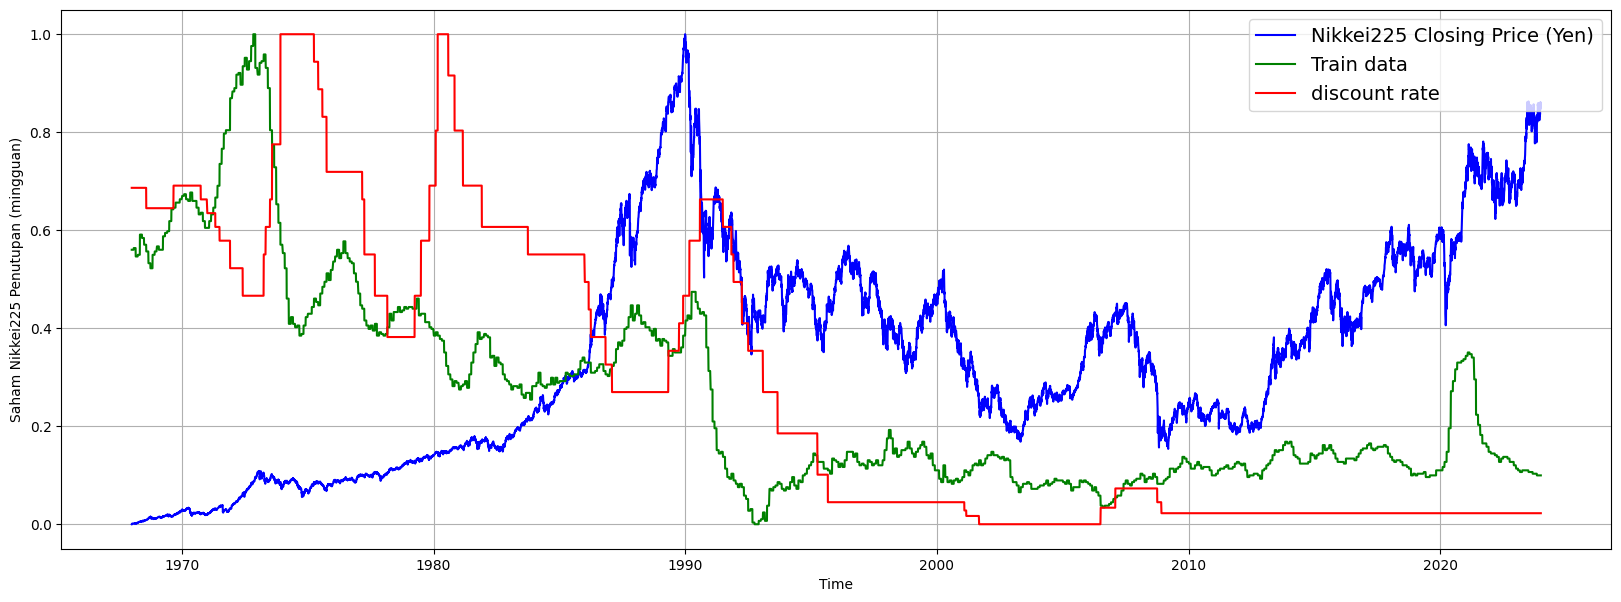

In [ ]:

plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = scaled_nikkei225_close_multivariate_df["Closing Price (Yen)"], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = scaled_nikkei225_close_multivariate_df["money_stock"], format = "-", label = "Train data", color ='g')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = scaled_nikkei225_close_multivariate_df["discount_rate"], format = "-", label = "discount rate", color = 'r')


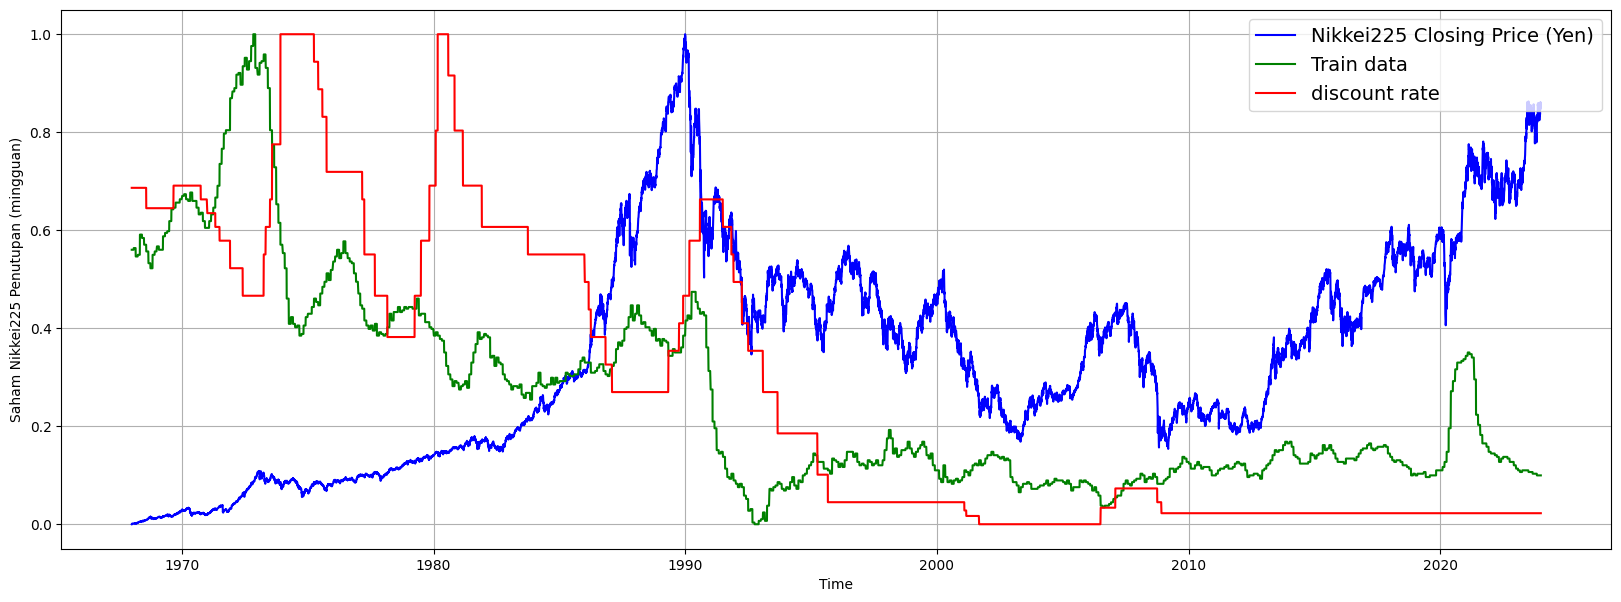

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,0], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,1], format = "-", label = "Train data", color ='g')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,2], format = "-", label = "discount rate", color = 'r')



# menghitung korelasi antar time series

In [ ]:
normalized_data[:,0].reshape(-1, 1)

array([[0.00000000e+00],
       [4.27892992e-04],
       [3.85395861e-04],
       ...,
       [8.60964526e-01],
       [8.57202998e-01],
       [8.55198993e-01]])

In [ ]:
(normalized_data[:,0])

array([0.00000000e+00, 4.27892992e-04, 3.85395861e-04, ...,
       8.60964526e-01, 8.57202998e-01, 8.55198993e-01])

In [ ]:
type(normalized_data[:,0])

numpy.ndarray

In [ ]:
import numpy as np
# menghitung koefisien korelasi dengan numpy

corr_coef = np.corrcoef(normalized_data[:,0], normalized_data[:,1])
print("Correlation coefficient saham dengan mooney supply: \n", corr_coef)

corr_coef = np.corrcoef(normalized_data[:,0], normalized_data[:,2])
print("Correlation coefficient saham dengan discount rate: \n", corr_coef)

Correlation coefficient saham dengan mooney supply: 
 [[ 1.         -0.49744783]
 [-0.49744783  1.        ]]
Correlation coefficient saham dengan discount rate: 
 [[ 1.         -0.51308293]
 [-0.51308293  1.        ]]


In [ ]:

# menghitung korelasi dengan pandas

corr_matrix = scaled_nikkei225_close_multivariate_df.corr(method = "pearson")
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                     Closing Price (Yen)  money_stock  discount_rate
Closing Price (Yen)             1.000000    -0.497448      -0.513083
money_stock                    -0.497448     1.000000       0.702302
discount_rate                  -0.513083     0.702302       1.000000


In [ ]:
# menghitung korelasi dengan pandas

corr_matrix = scaled_nikkei225_close_multivariate_df.corr(method = "spearman")
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                     Closing Price (Yen)  money_stock  discount_rate
Closing Price (Yen)             1.000000    -0.496075      -0.499816
money_stock                    -0.496075     1.000000       0.708115
discount_rate                  -0.499816     0.708115       1.000000


In [ ]:
# menghitung korelasi dengan pandas

corr_matrix = scaled_nikkei225_close_multivariate_df.corr(method = "kendall")
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                     Closing Price (Yen)  money_stock  discount_rate
Closing Price (Yen)             1.000000    -0.339676      -0.325313
money_stock                    -0.339676     1.000000       0.493086
discount_rate                  -0.325313     0.493086       1.000000


mungkin plotnya yang ini bisa di zoom supaya keliatan perbedaan data fluktuasi minigguan dan bulanannya

# Membuat dataset multivariate menjadi format sliding window dengan pendekatan multistep multivariate time series forecasting

In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

SPLIT_SIZE = 0.9 # 80% data untuk train test 20% untuk test size

In [ ]:
nikkei225_close_multivariate_df[:2]

Closing Price (Yen) money_stock discount_rate
Date                                                     
1968-01-04              1266.27        15.7          6.21
1968-01-05              1282.38        15.7          6.21

In [ ]:
scaled_nikkei225_close_multivariate_df[:2]

Closing Price (Yen)  money_stock  discount_rate
0             0.000000     0.560137       0.686517
1             0.000428     0.560137       0.686517

membuat window dan horizon multivariate

In [ ]:
len(scaled_nikkei225_close_multivariate_df)

14628

In [ ]:

# データ数
sample_size = len(scaled_nikkei225_close_multivariate_df)
# 予測に用いる期間
train_size = int(sample_size*SPLIT_SIZE)
test_size = sample_size - train_size

In [ ]:
sample_size

14628

In [ ]:
# データセットを作る関数

import numpy as np

def make_dataset(raw_data, WINDOW_SIZE=7, HORIZON = 1):
    _X = []
    _y = []

    for i in range(len(raw_data) - WINDOW_SIZE - HORIZON + 1):
        _X.append(raw_data[i : i + WINDOW_SIZE])
        _y.append(raw_data[i + WINDOW_SIZE : i + WINDOW_SIZE + HORIZON])
    _X = np.array(_X).reshape(len(_X), WINDOW_SIZE, 1)
    _y = np.array(_y).reshape(len(_y), HORIZON, 1)

    return _X, _y

In [ ]:
from sklearn import preprocessing

columns = list(scaled_nikkei225_close_multivariate_df.columns)

# 最小0、最大1に正規化
Xs = []
for i in range(len(columns)):
    Xs.append((scaled_nikkei225_close_multivariate_df[columns[i]]))
Xs = np.array(Xs)

X_nikkei, y_nikkei = make_dataset(Xs[0], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)
X_moneyStock, y_moneyStock = make_dataset(Xs[1], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)
X_discRate, y_discRate = make_dataset(Xs[2], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)


# 多変量LSTM用に各データを結合
X_concat = np.concatenate([X_nikkei, X_moneyStock, X_discRate], axis=2)
y_concat = np.concatenate([y_nikkei, y_moneyStock, y_discRate], axis=2)

In [ ]:
full_windows = X_concat
full_labels = y_concat

In [ ]:
len(full_windows), len(full_labels)

(14621, 14621)

In [ ]:
scaled_nikkei225_close_multivariate_df[:13]

Closing Price (Yen)  money_stock  discount_rate
0              0.000000     0.560137       0.686517
1              0.000428     0.560137       0.686517
2              0.000385     0.560137       0.686517
3              0.000458     0.560137       0.686517
4              0.001054     0.560137       0.686517
5              0.000978     0.560137       0.686517
6              0.001345     0.560137       0.686517
7              0.001280     0.560137       0.686517
8              0.001386     0.560137       0.686517
9              0.001294     0.560137       0.686517
10             0.001427     0.560137       0.686517
11             0.001507     0.560137       0.686517
12             0.001234     0.560137       0.686517

In [ ]:
print(full_windows[0]),
print(full_windows.shape)
print("\n")
print(full_labels[0])
print(full_labels.shape)

[[0.00000000e+00 5.60137457e-01 6.86516854e-01]
 [4.27892992e-04 5.60137457e-01 6.86516854e-01]
 [3.85395861e-04 5.60137457e-01 6.86516854e-01]
 [4.58437805e-04 5.60137457e-01 6.86516854e-01]
 [1.05366325e-03 5.60137457e-01 6.86516854e-01]
 [9.78496451e-04 5.60137457e-01 6.86516854e-01]
 [1.34450300e-03 5.60137457e-01 6.86516854e-01]]
(14621, 7, 3)


[[0.00128023 0.56013746 0.68651685]]
(14621, 1, 3)


In [ ]:
print(full_windows[1]),
print(full_windows.shape)
print("\n")
print(full_labels[1])
print(full_labels.shape)

[[4.27892992e-04 5.60137457e-01 6.86516854e-01]
 [3.85395861e-04 5.60137457e-01 6.86516854e-01]
 [4.58437805e-04 5.60137457e-01 6.86516854e-01]
 [1.05366325e-03 5.60137457e-01 6.86516854e-01]
 [9.78496451e-04 5.60137457e-01 6.86516854e-01]
 [1.34450300e-03 5.60137457e-01 6.86516854e-01]
 [1.28022608e-03 5.60137457e-01 6.86516854e-01]]
(14621, 7, 3)


[[0.0013862  0.56013746 0.68651685]]
(14621, 1, 3)


format training atau test data pada **window/fitur** adalah **(jumlah sample, ukuran window, jumlah variable)**

In [ ]:
full_windows.shape

(14621, 7, 3)

format training atau test data pada **label** adalah **(jumlah sample, jumlah variabel)**

In [ ]:
full_labels.shape

(14621, 1, 3)

In [ ]:
full_labels = np.squeeze(full_labels)
full_labels.shape

(14621, 3)

In [ ]:
full_labels[:3]

array([[0.00128023, 0.56013746, 0.68651685],
       [0.0013862 , 0.56013746, 0.68651685],
       [0.00129377, 0.56013746, 0.68651685]])

Membagi data menjadi training dataset dan test data set. Pembagian data menjadi train dan test dengan train series split dimana Test dataset akan menggunakan data yang pseusdo future (data yang seakan2 berperan dari masa depan).

In [ ]:
(sample_size), (train_size), (test_size)

(14628, 13165, 1463)

In [ ]:
train_size

13165

In [ ]:
train_windows = full_windows[:train_size]
test_windows = full_windows[train_size:]

train_labels = full_labels[:train_size]
test_labels = full_labels[train_size:]

In [ ]:
len(full_windows), len(train_windows), len(test_windows)

(14621, 13165, 1456)

In [ ]:
"windows", train_windows[12393:], "Labels",train_labels[12393:]

('windows',
 array([[[0.41206972, 0.1443299 , 0.02247191],
         [0.42119544, 0.1443299 , 0.02247191],
         [0.42313278, 0.1443299 , 0.02247191],
         ...,
         [0.43093579, 0.1443299 , 0.02247191],
         [0.4172031 , 0.1443299 , 0.02247191],
         [0.42703747, 0.1443299 , 0.02247191]],
 
        [[0.42119544, 0.1443299 , 0.02247191],
         [0.42313278, 0.1443299 , 0.02247191],
         [0.42833178, 0.1443299 , 0.02247191],
         ...,
         [0.4172031 , 0.1443299 , 0.02247191],
         [0.42703747, 0.1443299 , 0.02247191],
         [0.4255684 , 0.1443299 , 0.02247191]],
 
        [[0.42313278, 0.1443299 , 0.02247191],
         [0.42833178, 0.1443299 , 0.02247191],
         [0.43093579, 0.1443299 , 0.02247191],
         ...,
         [0.42703747, 0.1443299 , 0.02247191],
         [0.4255684 , 0.1443299 , 0.02247191],
         [0.42589005, 0.1443299 , 0.02247191]],
 
        ...,
 
        [[0.57152559, 0.1443299 , 0.02247191],
         [0.57101988, 0.14432

In [ ]:
"windows", test_windows[:2], "Labels",test_labels[:2]

('windows',
 array([[[0.59624166, 0.13745704, 0.02247191],
         [0.59983957, 0.13745704, 0.02247191],
         [0.59819839, 0.13745704, 0.02247191],
         [0.59613276, 0.13745704, 0.02247191],
         [0.59462916, 0.13745704, 0.02247191],
         [0.59625096, 0.13745704, 0.02247191],
         [0.60254398, 0.13745704, 0.02247191]],
 
        [[0.59983957, 0.13745704, 0.02247191],
         [0.59819839, 0.13745704, 0.02247191],
         [0.59613276, 0.13745704, 0.02247191],
         [0.59462916, 0.13745704, 0.02247191],
         [0.59625096, 0.13745704, 0.02247191],
         [0.60254398, 0.13745704, 0.02247191],
         [0.60032696, 0.13745704, 0.02247191]]]),
 'Labels',
 array([[0.60032696, 0.13745704, 0.02247191],
        [0.59753888, 0.13745704, 0.02247191]]))

# LANJUT BIKIN FUNGSI EVALUASI DAN BIKIN MODEL

# Membuat fungsi untuk melakukan evaluasi regression problem

fungsi digunakan untuk menguji prediksi model dengan nilai sebenarnya dan menghasilkan nilai evaluasi masing-masing metrik

In [ ]:
import tensorflow as tf


sehingga yang dilakukan dengan tf.reduce_mean adalah melakukan agregasi ke banyak nilai mae akibat dari horizon yang ukurannya lebih dari satu menjadi satu single value seperti yang dilakukan tensorflow

tf.reduce_mean mampu menghasilkan satu nilai mae yang sudah direratakan dan hasilnya sama dengan yang dihitung dari model saat evaluasi metrik MAE-nya dengan .evaluate, menghasilkan nilai MAE yang sama-sama 892.1709

In [ ]:
def evaluate_preds(y_true, y_pred):
  #Pastikan data yang diproses dengan library tensorflow bertipe float32
  y_true = tf.cast(y_true, dtype = tf.float32) #karena metrik evaluasi dari library tensorflow bisa
  y_pred = tf.cast(y_pred, dtype = tf.float32) #memunculkan error jika tipe bukan float32

  y_true = tf.squeeze(y_true)
  y_pred = tf.squeeze(y_pred)

  # menghitung metrik evaluasi regression problem
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  # mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  # mape akan digunakan, yang disarankan jangan digunakan adalah sMAPE
  #mase = mean_absolute_scaled_error(y_true, y_pred) #tidak digunakan

  # kalkulasi nilai R-square
  from sklearn.metrics import r2_score
  Rsquare = r2_score(y_true, y_pred)

  # memperhitungkan berbagai ukuran metrics
  # (artinya untuk horizon yang lebih besar akan menghasilkan metrics (ex: MAE) yang berukuran dimensi lebih besar,
  # sehingga perlu di lakukan tf.reduce_mean lebih lanjut supaya menghasilkan single value metrics)

  # Calculate various metrics
  # (meaning for larger horizon will produce metrics (ex: MAE) with larger dimension,
  # so tf.reduce_mean is needed to produce single value metrics)
  if mae.ndim>0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    Rsquare = tf.reduce_mean(Rsquare)
    #mape = tf.reduce_mean(mape)
    #mase = tf.reduce_mean(mase)

  return {"mae" : mae.numpy(), #ditampilkan dalam bentuk numpy bukan tensor
          "mse" : mse.numpy(),
          "rmse" : rmse.numpy(),
          #"mape" : mape.numpy(),
          #"mase" : mase.numpy(),
          "R-square" : Rsquare}


# membuat modelling checkpoint

karena model akan belajar terus menerus pada masing-masing epoch, diantara epoch-epoch tersebut dapat menghasilkan pembelajaran terbaik tidak hanya di eopch terakhir saja. Maka dari itu, epoch yang memiliki hasil terbaik akan di simpan selama training.  

Dengan menyimpan epoch yang terbaik, model yang akan dibuat adalah model yang terbaik dan dapat dibandingkan dengan model terbaik lainnya secara adil.

Untuk membuat modelling checkpoint callback digunakan: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [ ]:
# membuat modelling checkpoint

import os # membuat folder untuk menyimpan best model

# mmebuat function untuk implementasi ModelCheckpoint callback
def create_model_checkpoint(model_name, save_path = "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                                                    verbose = 1,
                                                                    save_best_only = True)

In [ ]:
train_windows.shape

(13165, 7, 3)

In [ ]:
train_windows[0:2]

array([[[0.00000000e+00, 5.60137457e-01, 6.86516854e-01],
        [4.27892992e-04, 5.60137457e-01, 6.86516854e-01],
        [3.85395861e-04, 5.60137457e-01, 6.86516854e-01],
        [4.58437805e-04, 5.60137457e-01, 6.86516854e-01],
        [1.05366325e-03, 5.60137457e-01, 6.86516854e-01],
        [9.78496451e-04, 5.60137457e-01, 6.86516854e-01],
        [1.34450300e-03, 5.60137457e-01, 6.86516854e-01]],

       [[4.27892992e-04, 5.60137457e-01, 6.86516854e-01],
        [3.85395861e-04, 5.60137457e-01, 6.86516854e-01],
        [4.58437805e-04, 5.60137457e-01, 6.86516854e-01],
        [1.05366325e-03, 5.60137457e-01, 6.86516854e-01],
        [9.78496451e-04, 5.60137457e-01, 6.86516854e-01],
        [1.34450300e-03, 5.60137457e-01, 6.86516854e-01],
        [1.28022608e-03, 5.60137457e-01, 6.86516854e-01]]])

In [ ]:
train_labels[0:2]

array([[0.00128023, 0.56013746, 0.68651685],
       [0.0013862 , 0.56013746, 0.68651685]])

In [ ]:
train_labels.shape

(13165, 3)

In [ ]:
test_windows.shape

(1456, 7, 3)

In [ ]:
test_labels.shape

(1456, 3)

In [ ]:
# keterangan jumlah feature
test_labels.shape[1]

3

Mulai membuat model Keras

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
from keras import Model
from keras.layers import Input, Dense, Bidirectional, LSTM, RepeatVector, TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from numpy import array, hstack
import numpy as np

# Model 1: Conv1D

In [ ]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch


<ipython-input-93-b420bea64af7>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
# import library untuk mmebuat model

import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
train_windows.shape

(13165, 7, 3)

In [ ]:
train_labels.shape

(13165, 3)

In [ ]:
test_windows.shape

(1456, 7, 3)

In [ ]:
test_labels.shape

(1456, 3)

In [ ]:
test_labels.shape[1]

3

## Tuner Builder

In [ ]:
#create Conv1D model
def model_Conv1D_multi_builder(hp):
  tf.random.set_seed(42)

  model_1 = tf.keras.models.Sequential([


      #layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
      tf.keras.layers.Conv1D(filters = hp.Int('conv1D_n_filters', min_value=32, max_value=256, step=32),
                             kernel_size = hp.Int('conv1D_kernel_size', min_value=5, max_value=10, step=1),
                             strides = 1,
                             padding ="causal",
                             activation = "relu",
                             input_shape=[train_windows.shape[1], train_windows.shape[2]]),

      tf.keras.layers.GlobalMaxPooling1D(),  # Add GlobalMaxPooling1D layer
      tf.keras.layers.Dense(test_labels.shape[1])
      #filters adalah jumlah hidden unit dalam layers tersebut
      # kernel size adalah ukuran dari window. Ex: kernel_size = 7 artinya melihat 7 value sekaligus
      # default nilai strides = 1, ini sudah sesuai karena sliding window bergeser satu timesteps
  ], name = "model_1_conv1D_multivariate")

  #compile model 1
  model_1.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_1


In [ ]:
import keras_tuner as kt

tuner_Conv1D_multi = kt.Hyperband(model_Conv1D_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs',
                     project_name='Conv1D_multivariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/Conv1D_multivariate/tuner0.json


## Proses tuning


In [ ]:
tuner_Conv1D_multi.search(train_windows,
                          train_labels,
                          epochs=10,
                          validation_data=(test_windows, test_labels),
                          batch_size = 128)

## Hasil parameter tuning terbaik

In [ ]:
tuner_Conv1D_multi.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_Conv1D_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ['conv1D_n_filters', 'conv1D_kernel_size', 'learning_rate']
print('Best tune model Conv1D multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model Conv1D multivariate:
conv1D_n_filters: 192
conv1D_kernel_size: 7
learning_rate: 0.001


## Hasil parameter tuning 10 terbaik

In [ ]:
tuning =['conv1D_n_filters', 'conv1D_kernel_size', 'learning_rate']
top10_hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

top10_hps=tuner_Conv1D_multi.get_best_hyperparameters(num_trials=10)
for hps in top10_hps:
  for t in tuning:
    top10_hps_dict[t].append(hps.get(t))

df_top10 = pd.DataFrame(top10_hps_dict)
df_top10.to_csv('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/best_hyperparameter_models/hp_top10_Conv1D_multi.csv')
df_top10


conv1D_n_filters  conv1D_kernel_size  learning_rate
0               192                   7         0.0010
1                96                   6         0.0100
2                96                   7         0.0010
3               256                   9         0.0010
4               256                   8         0.0001
5               256                  10         0.0010
6               256                  10         0.0010
7               256                   8         0.0001
8               128                   7         0.0001
9                96                   6         0.0100

In [ ]:
tuner_Conv1D_multi.results_summary(num_trials=10)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/Conv1D_multivariate
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0026 summary
Hyperparameters:
conv1D_n_filters: 192
conv1D_kernel_size: 7
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.004613867029547691

Trial 0018 summary
Hyperparameters:
conv1D_n_filters: 96
conv1D_kernel_size: 6
learning_rate: 0.01
tuner/epochs: 4
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.005006912164390087

Trial 0028 summary
Hyperparameters:
conv1D_n_filters: 96
conv1D_kernel_size: 7
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.005010722670704126

Trial 0027 summary
Hyperparameters:
conv1D_n_filters: 256
conv1D_kernel_size: 9
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.00506049208343029

Trial 0016 summar

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_1 = tuner_Conv1D_multi.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_1 = load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_1_Conv1D_multivariate.h5")

In [ ]:
# fit
history = model_1.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/50
 82/103 [======================>.......] - ETA: 0s - loss: 0.0342
Epoch 1: val_loss improved from inf to 0.02282, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_1_conv1D_multivariate
103/103 [==============================] - 2s 10ms/step - loss: 0.0300 - val_loss: 0.0228
Epoch 2/50
 85/103 [=======================>......] - ETA: 0s - loss: 0.0107
Epoch 2: val_loss improved from 0.02282 to 0.01260, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_1_conv1D_multivariate
103/103 [==============================] - 1s 9ms/step - loss: 0.0103 - val_loss: 0.0126
Epoch 3/50
 90/103 [=========================>....] - ETA: 0s - loss: 0.0102
Epoch 3: val_loss did not improve from 0.01260
103/103 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.0133
Epoch 4/50
 90/103 [=========================>....] - ETA: 0s - loss: 0.0132
Epoch 4: val_loss improved from 0.01260 to 0.0104

visualisasi model shape

In [ ]:
model_1.summary()

Model: "model_1_conv1D_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 7, 32)             512       
                                                                 
 global_max_pooling1d_2 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_14 (Dense)            (None, 3)                 99        
                                                                 
Total params: 611 (2.39 KB)
Trainable params: 611 (2.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


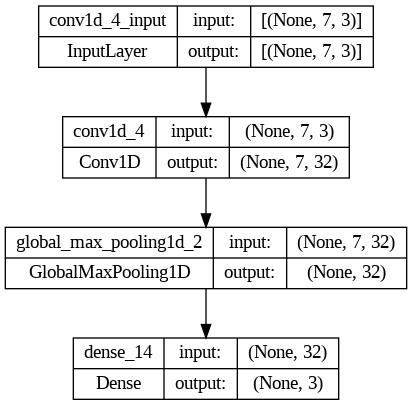

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_1, to_file='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_plot/model_Conv1D_multi_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

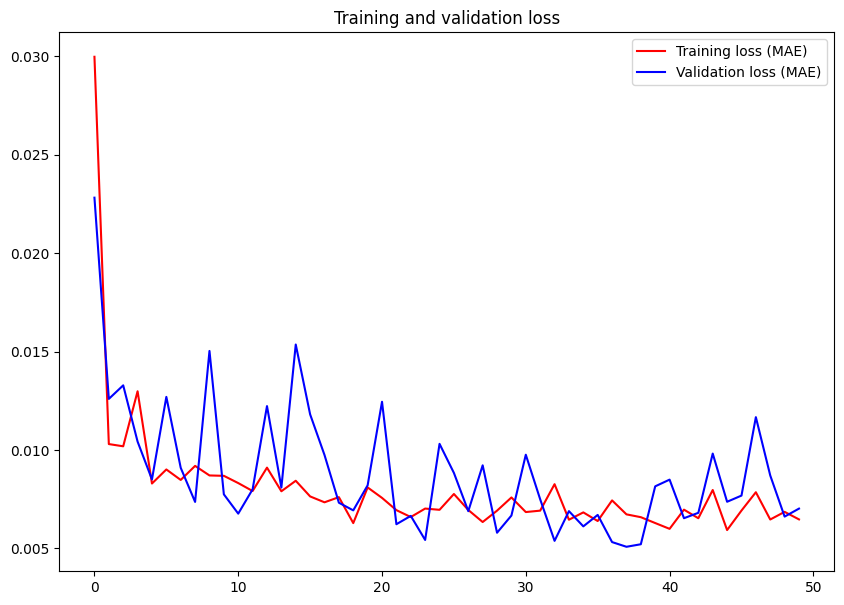

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.legend(loc=0)



# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_loss_visualization/loss_Conv1D_multi.png')

In [ ]:
# mengevaluasi model 1 dari epochs terakhir
model_1.evaluate(test_windows, test_labels)

46/46 [==============================] - 0s 2ms/step - loss: 0.0070


0.007021746598184109

In [ ]:
# mengevaluasi dan load model 1 pada best epoch yang loss mae paling kecil sepanjang training

model_1 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_1_conv1D_multivariate")
model_1.evaluate(test_windows, test_labels)


46/46 [==============================] - 0s 2ms/step - loss: 0.0051


0.005082011688500643

In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_1_preds = tf.squeeze(model_1.predict(test_windows))
model_1_preds



46/46 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(1456, 3), dtype=float32, numpy=
array([[0.59506166, 0.13816102, 0.02055131],
       [0.59549665, 0.13832161, 0.02079896],
       [0.59541917, 0.13836409, 0.02071267],
       ...,
       [0.84669656, 0.09412006, 0.02432841],
       [0.84983003, 0.09479656, 0.02550915],
       [0.8510857 , 0.09473135, 0.02535573]], dtype=float32)>

In [681]:
# mengukur predicted value ketiga time series dengan metrik evaluasi regresion problem

model_1_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_1_preds)

model_1_results["mae"]

0.0050820117

In [ ]:
# mengukur predicted value dari stock time series saja dengan metrik evaluasi regresion problem

model_1_results = evaluate_preds(y_true = test_labels[:, 0],
                                 y_pred = model_1_preds[:, 0])

model_1_results

{'mae': 0.009844486,
 'mse': 0.00017780319,
 'rmse': 0.013334286,
 'R-square': 0.9829123892135504}

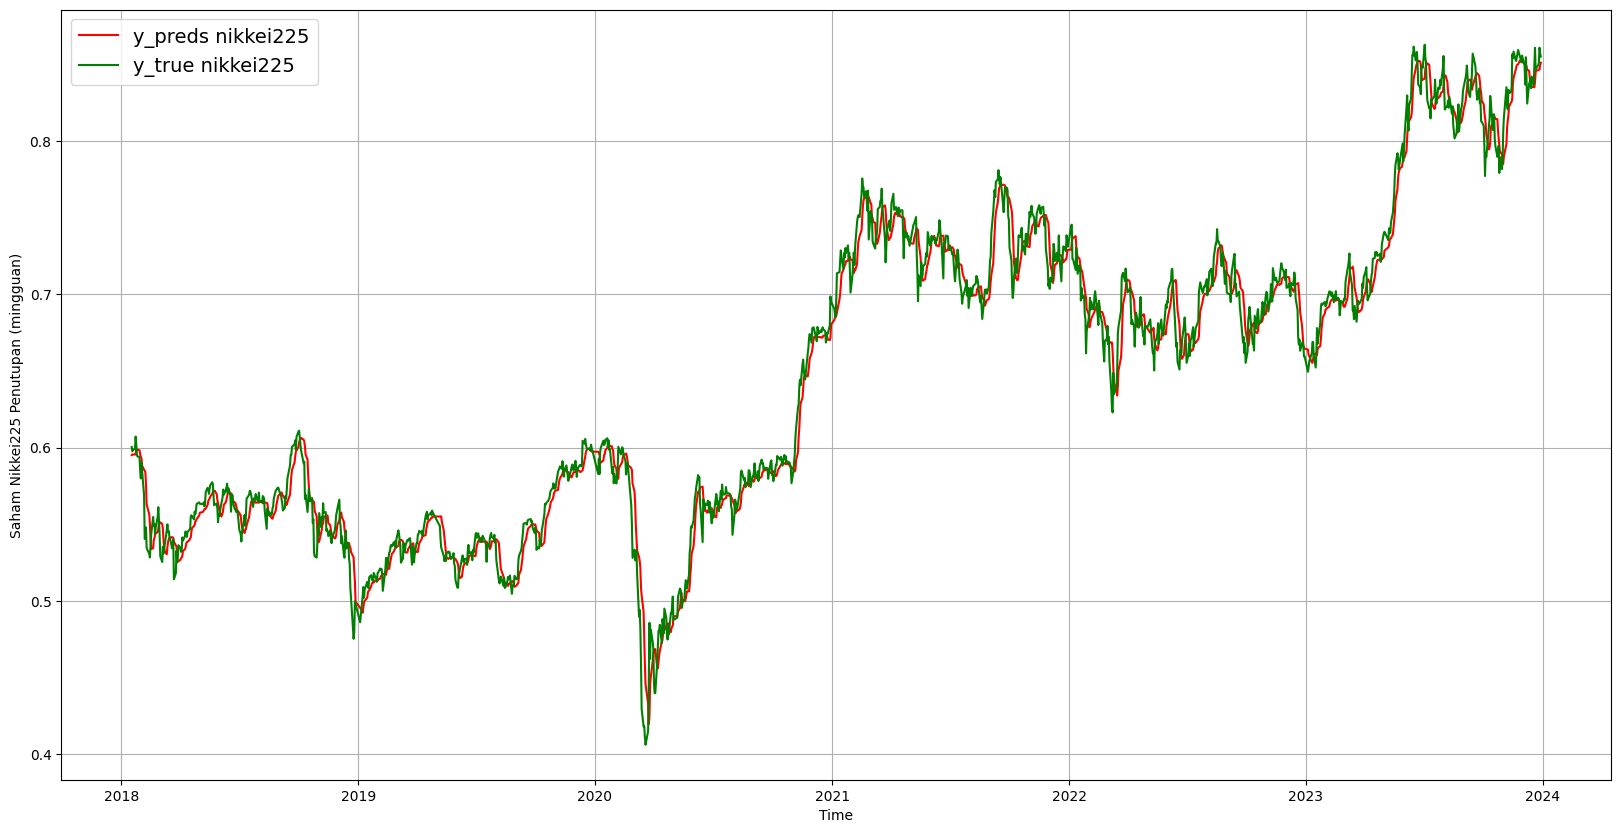

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_1_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/visualisasi_prediksi_time_series/model_1_plot_prediksi_Conv1D_multi.png')

simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_1, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_1_Conv1D_multivariate.h5")

<ipython-input-463-d1e0283355e9>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_1, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_1_Conv1D_multivariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_1 = load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_1_Conv1D_multivariate.h5")

# Model 2 : LSTM

In [ ]:
train_windows.shape[2]

3

## Tuner Builder

In [ ]:
# membuat model LSTM dengan hyperparameter tuning

def model_LSTM_multi_builder(hp):
  tf.random.set_seed(42)

  model_2 = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(units = hp.Int('lstm_n_units', min_value=32, max_value=256, step=32),
                               input_shape=(train_windows.shape[1], train_windows.shape[2]),
                               return_sequences = False,
                               activation = "relu"),

          #tf.keras.layers.Dropout(0.2),
          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(test_labels.shape[1])
          ], name = "model_2_LSTM_multivariate")



  #compile model 2
  model_2.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_2

In [ ]:
import keras_tuner as kt

tuner_LSTM_multi = kt.Hyperband(model_LSTM_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs',
                     project_name='LSTM_multivariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/LSTM_multivariate/tuner0.json


## Proses tuning


In [ ]:
tuner_LSTM_multi.search(train_windows,
                        train_labels,
                        epochs=10,
                        validation_data=(test_windows, test_labels),
                        batch_size = 128)

## Hasil parameter tuning terbaik

In [ ]:
tuner_Conv1D_multi.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_LSTM_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ['lstm_n_units', 'learning_rate']
print('Best tune model LSTM multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model LSTM multivariate:
lstm_n_units: 128
learning_rate: 0.01


## Hasil parameter tuning 10 terbaik

In [ ]:
tuning =['lstm_n_units', 'learning_rate']
top10_hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

top10_hps=tuner_LSTM_multi.get_best_hyperparameters(num_trials=10)
for hps in top10_hps:
  for t in tuning:
    top10_hps_dict[t].append(hps.get(t))

df_top10 = pd.DataFrame(top10_hps_dict)
df_top10.to_csv('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/best_hyperparameter_models/hp_top10_LSTM_multi.csv')
df_top10


lstm_n_units  learning_rate
0           128         0.0100
1           192         0.0100
2           128         0.0100
3           192         0.0100
4           128         0.0100
5           256         0.0100
6            96         0.0010
7           192         0.0010
8           192         0.0001
9           192         0.0001

In [ ]:
tuner_LSTM_multi.results_summary(num_trials=10)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/LSTM_multivariate
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0016 summary
Hyperparameters:
lstm_n_units: 128
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.0041924226097762585

Trial 0024 summary
Hyperparameters:
lstm_n_units: 192
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0023
Score: 0.004198690876364708

Trial 0012 summary
Hyperparameters:
lstm_n_units: 128
learning_rate: 0.01
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0008
Score: 0.0042653451673686504

Trial 0023 summary
Hyperparameters:
lstm_n_units: 192
learning_rate: 0.01
tuner/epochs: 4
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.00473869638517499

Trial 0008 summary
Hyperparameters:
lstm_n_units: 128
learni

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_2 = tuner_LSTM_multi.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_2 = load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_2_LSTM_multivariate.h5")

In [ ]:

# fit
history = model_2.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

Epoch 1/50
 96/103 [==========================>...] - ETA: 0s - loss: 0.0394
Epoch 1: val_loss improved from inf to 0.02018, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_2_LSTM_multivariate
103/103 [==============================] - 4s 26ms/step - loss: 0.0374 - val_loss: 0.0202
Epoch 2/50
100/103 [============================>.] - ETA: 0s - loss: 0.0094
Epoch 2: val_loss improved from 0.02018 to 0.01463, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_2_LSTM_multivariate
103/103 [==============================] - 2s 23ms/step - loss: 0.0094 - val_loss: 0.0146
Epoch 3/50
 99/103 [===========================>..] - ETA: 0s - loss: 0.0094
Epoch 3: val_loss improved from 0.01463 to 0.01032, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_2_LSTM_multivariate
103/103 [==============================] - 2s 23ms/step - loss: 0.0093 - val_loss: 0.0103
Epoch 4/50


visualisasi model shape

In [ ]:
model_2.summary()

Model: "model_2_LSTM_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 32)                4608      
                                                                 
 dense_15 (Dense)            (None, 3)                 99        
                                                                 
Total params: 4707 (18.39 KB)
Trainable params: 4707 (18.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


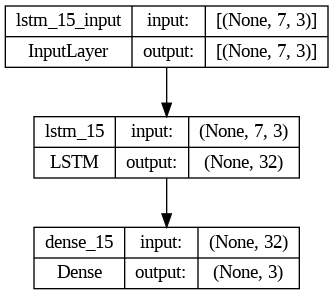

In [ ]:

from tensorflow.keras.utils import plot_model

plot_model(model_2, to_file='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_plot/model_LSTM_multi_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

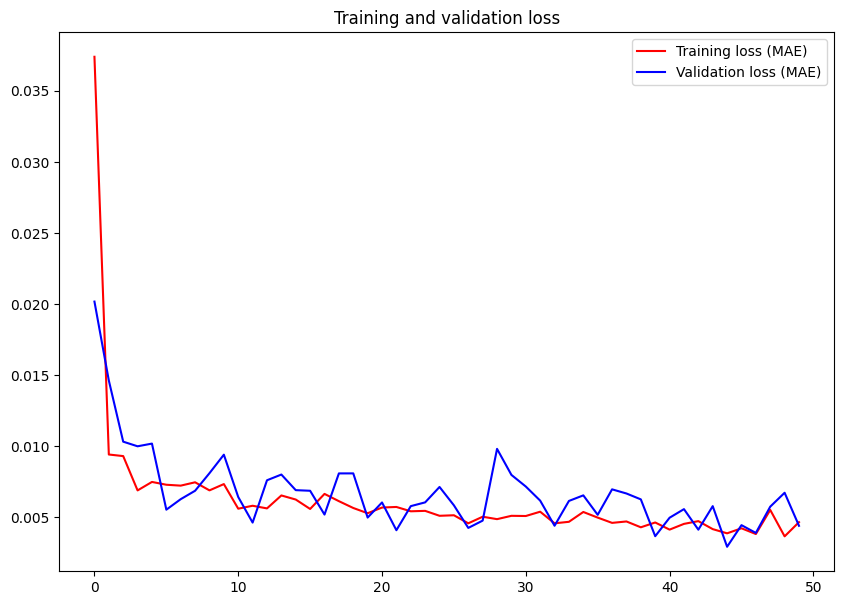

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.legend(loc=0)


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_loss_visualization/loss_LSTM_multi.png')

In [ ]:
# mengevaluasi model 2 dari epochs terakhir
model_2.evaluate(test_windows, test_labels)

46/46 [==============================] - 0s 2ms/step - loss: 0.0044


0.004404776263982058

In [ ]:
# mengevaluasi dan load model 2 pada best epoch yang loss mae paling kecil sepanjang training

model_2 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_2_LSTM_multivariate")
model_2.evaluate(test_windows, test_labels)


46/46 [==============================] - 0s 2ms/step - loss: 0.0029


0.002928829053416848

In [ ]:
# membuat predicted value berdasarkan model multivariate model_2 yang sudah di train

model_2_preds = tf.squeeze(model_2.predict(test_windows))
model_2_preds



46/46 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(1456, 3), dtype=float32, numpy=
array([[0.60051894, 0.13719128, 0.02179927],
       [0.5975678 , 0.1373429 , 0.02175152],
       [0.5951056 , 0.1374472 , 0.02177016],
       ...,
       [0.8496847 , 0.10073379, 0.0231384 ],
       [0.8610053 , 0.10055073, 0.02331048],
       [0.8541354 , 0.10080302, 0.0231732 ]], dtype=float32)>

In [ ]:
model_2_preds[:,2]

<tf.Tensor: shape=(1456,), dtype=float32, numpy=
array([0.02179927, 0.02175152, 0.02177016, ..., 0.0231384 , 0.02331048,
       0.0231732 ], dtype=float32)>

In [682]:
# mengukur predicted value ketiga time series dengan metrik evaluasi regresion problem

model_2_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_2_preds)

model_2_results["mae"]

0.0029288295

In [ ]:
# mengukur predicted value dari stock time series saja dengan metrik evaluasi regresion problem

model_2_results = evaluate_preds(y_true = test_labels[:, 0],
                                 y_pred = model_2_preds[:, 0])

model_2_results

{'mae': 0.006727761,
 'mse': 7.652099e-05,
 'rmse': 0.008747628,
 'R-square': 0.9926460218212234}

In [ ]:
tf.squeeze(test_labels[:,0])

<tf.Tensor: shape=(1456,), dtype=float64, numpy=
array([0.60032696, 0.59753888, 0.59872588, ..., 0.86096453, 0.857203  ,
       0.85519899])>

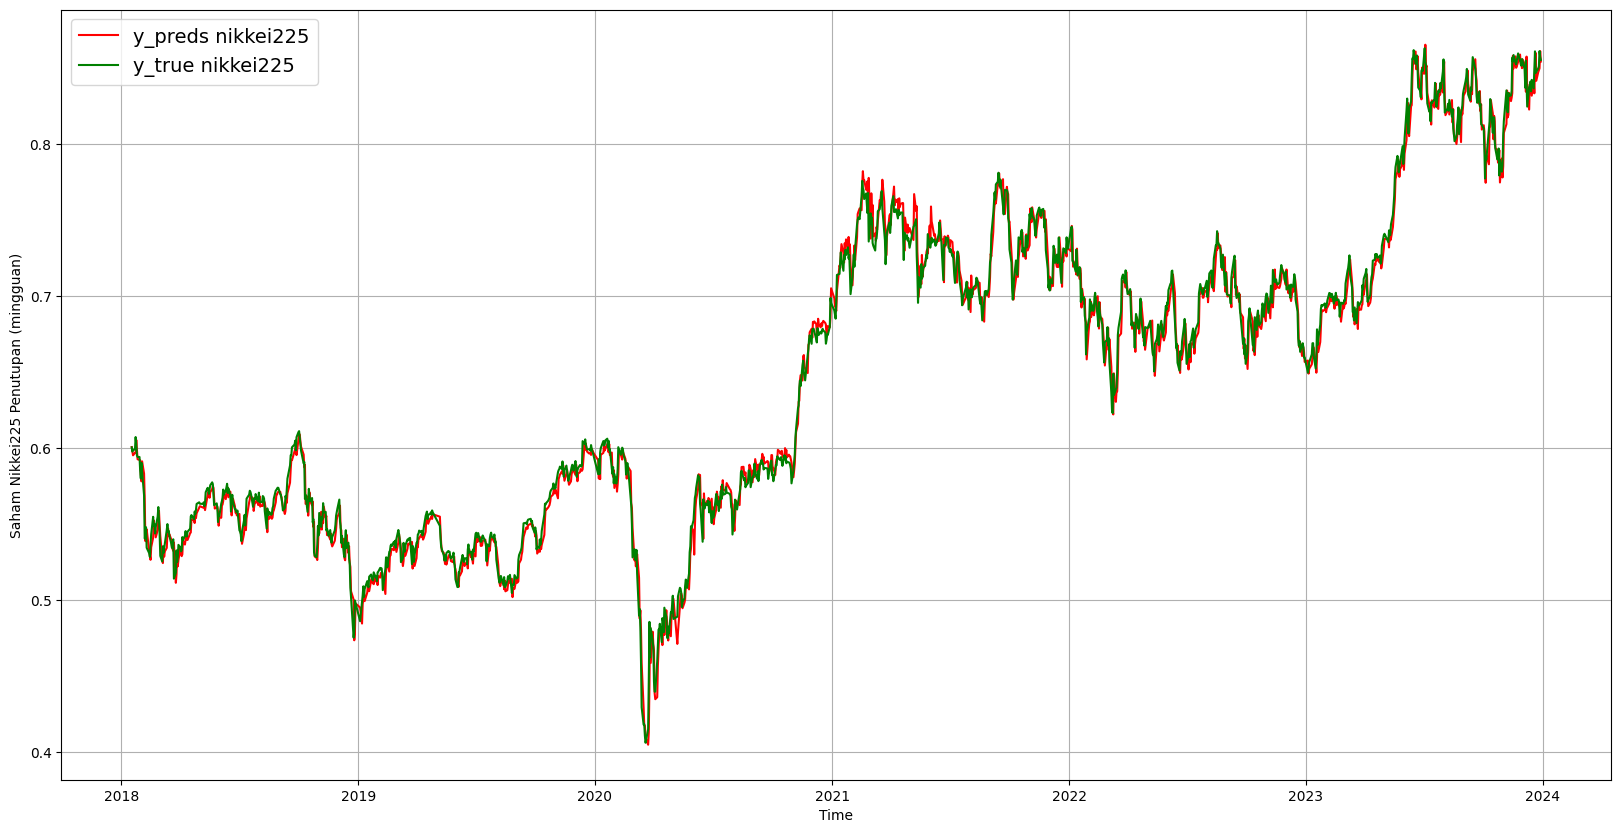

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_2_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/visualisasi_prediksi_time_series/model_2_plot_prediksi_LSTM_multi.png')

simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_2, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_2_LSTM_multivariate.h5")

<ipython-input-477-4fd07f688f98>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_2, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_2_LSTM_multivariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_2 = load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_2_LSTM_multivariate.h5")

# Model 3 : Stacked LSTM

In [ ]:
train_windows.shape[2]

3

## Tuner Builder

In [ ]:
# model stacked LSTM dengan hyperparameter tuning

def model_stacked_LSTM_multi_builder(hp):
  tf.random.set_seed(42)

  model_3 = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(units =  hp.Int('lstm_n_units_1', min_value=32, max_value=256, step=32),
                               input_shape=(train_windows.shape[1], train_windows.shape[2]),
                               return_sequences = True,
                               activation = "relu"),

          #tf.keras.layers.Dropout(0.2, seed=42),
          tf.keras.layers.LSTM(units = hp.Int('lstm_n_units_2', min_value=32, max_value=256, step=32),
                               return_sequences = False,
                               activation = "relu"),

          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(test_labels.shape[1])
          ], name = "model_3_stackedLSTM_multivariate")



  #compile model 3
  model_3.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_3

In [ ]:
import keras_tuner as kt

tuner_stackedLSTM_multi = kt.Hyperband(model_stacked_LSTM_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs',
                     project_name='stackedLSTM_multivariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/stackedLSTM_multivariate/tuner0.json


## Proses tuning


In [ ]:
tuner_stackedLSTM_multi.search(train_windows,
                               train_labels,
                               epochs=10,
                               validation_data=(test_windows, test_labels),
                               batch_size = 128)

## Hasil parameter tuning terbaik

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_stackedLSTM_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ['lstm_n_units_1', "lstm_n_units_2", 'learning_rate']
print('Best tune model stacked LSTM multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model stacked LSTM multivariate:
lstm_n_units_1: 256
lstm_n_units_2: 224
learning_rate: 0.0001


## Hasil parameter tuning 10 terbaik

In [ ]:
tuning = ['lstm_n_units_1', "lstm_n_units_2", 'learning_rate']
top10_hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

top10_hps=tuner_stackedLSTM_multi.get_best_hyperparameters(num_trials=10)
for hps in top10_hps:
  for t in tuning:
    top10_hps_dict[t].append(hps.get(t))

df_top10 = pd.DataFrame(top10_hps_dict)
df_top10.to_csv('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/best_hyperparameter_models/hp_top10_Stacked_LSTM_multi.csv')
df_top10




lstm_n_units_1  lstm_n_units_2  learning_rate
0             256             224         0.0001
1             128             224         0.0010
2             256             224         0.0001
3             224             256         0.0001
4             128             128         0.0010
5              96             256         0.0001
6              32              64         0.0100
7             128             224         0.0010
8             224             256         0.0001
9              96             256         0.0001

In [ ]:
tuner_stackedLSTM_multi.results_summary(num_trials=10)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/stackedLSTM_multivariate
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0024 summary
Hyperparameters:
lstm_n_units_1: 256
lstm_n_units_2: 224
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0022
Score: 0.00696186488494277

Trial 0016 summary
Hyperparameters:
lstm_n_units_1: 128
lstm_n_units_2: 224
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0014
Score: 0.007076599635183811

Trial 0022 summary
Hyperparameters:
lstm_n_units_1: 256
lstm_n_units_2: 224
learning_rate: 0.0001
tuner/epochs: 4
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.007653541397303343

Trial 0017 summary
Hyperparameters:
lstm_n_units_1: 224
lstm_n_units_2: 256
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/tri

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_3 = tuner_stackedLSTM_multi.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_3 = load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_3_stackedLSTM_multivariate.h5")



In [ ]:

# fit
history = model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

Epoch 1/50
103/103 [==============================] - ETA: 0s - loss: 0.0463
Epoch 1: val_loss improved from inf to 0.02397, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_3_stackedLSTM_multivariate
103/103 [==============================] - 8s 54ms/step - loss: 0.0463 - val_loss: 0.0240
Epoch 2/50
 99/103 [===========================>..] - ETA: 0s - loss: 0.0144
Epoch 2: val_loss improved from 0.02397 to 0.01437, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_3_stackedLSTM_multivariate
103/103 [==============================] - 4s 40ms/step - loss: 0.0143 - val_loss: 0.0144
Epoch 3/50
 99/103 [===========================>..] - ETA: 0s - loss: 0.0120
Epoch 3: val_loss improved from 0.01437 to 0.01187, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_3_stackedLSTM_multivariate
103/103 [==============================] - 5s 45ms/step - loss: 0.0119 - val_los

visualisasi model shape

In [ ]:
model_3.summary()

Model: "model_3_stackedLSTM_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 7, 32)             4608      
                                                                 
 lstm_17 (LSTM)              (None, 32)                8320      
                                                                 
 dense_16 (Dense)            (None, 3)                 99        
                                                                 
Total params: 13027 (50.89 KB)
Trainable params: 13027 (50.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


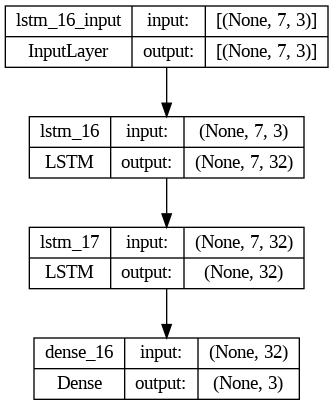

In [ ]:

from tensorflow.keras.utils import plot_model

plot_model(model_3, to_file='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_plot/model_stackedLSTM_multi_shape.png', show_shapes=True, show_layer_names=True)



visualisasi loss setiap epoch

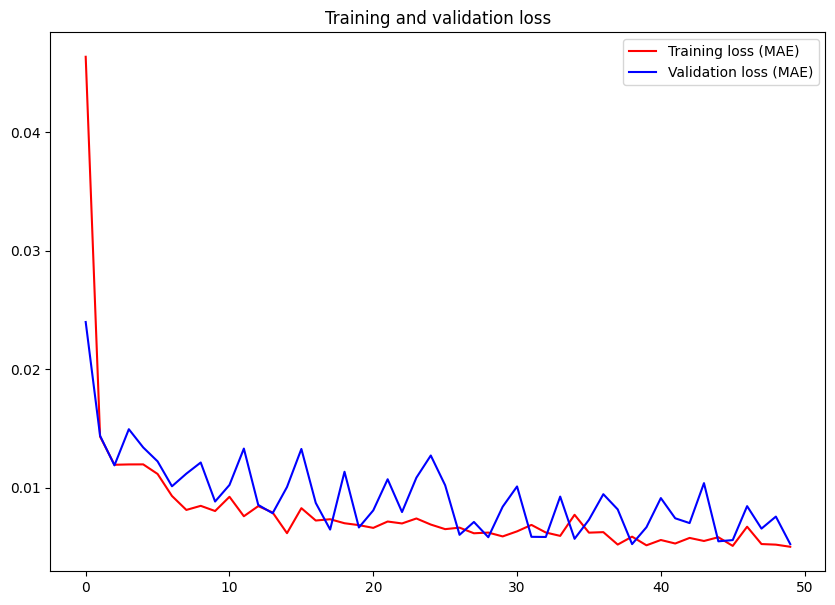

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.legend(loc=0)


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_loss_visualization/loss_stackedLSTM_multi.png')



In [ ]:
# mengevaluasi model 3 dari epochs terakhir
model_3.evaluate(test_windows, test_labels)

46/46 [==============================] - 0s 3ms/step - loss: 0.0052


0.005227585323154926

In [ ]:
# mengevaluasi dan load model 3 pada best epoch yang loss mae paling kecil sepanjang training

model_3 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_3_stackedLSTM_multivariate")
model_3.evaluate(test_windows, test_labels)


46/46 [==============================] - 0s 3ms/step - loss: 0.0052


0.005227190908044577

In [ ]:
# membuat predicted value berdasarkan model multivariate model_3 yang sudah di train

model_3_preds = tf.squeeze(model_3.predict(test_windows))
model_3_preds



46/46 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(1456, 3), dtype=float32, numpy=
array([[0.60388535, 0.13934614, 0.02321167],
       [0.6015283 , 0.13931459, 0.02370995],
       [0.5989988 , 0.13964546, 0.02385095],
       ...,
       [0.8496402 , 0.10740909, 0.01832464],
       [0.86190933, 0.10684141, 0.01783842],
       [0.85418725, 0.10709736, 0.0186636 ]], dtype=float32)>

In [683]:
# mengukur predicted value ketiga time series dengan metrik evaluasi regresion problem

model_3_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_3_preds)

model_3_results['mae']

0.005227192

In [ ]:

# mengukur predicted value dari stock time series dengan metrik evaluasi regresion problem

model_3_results = evaluate_preds(y_true = test_labels[:, 0],
                                 y_pred = model_3_preds[:, 0])

model_3_results

{'mae': 0.008062846,
 'mse': 0.000121833174,
 'rmse': 0.011037807,
 'R-square': 0.9882913366588671}

In [ ]:
tf.squeeze(test_labels[:,0])

<tf.Tensor: shape=(1456,), dtype=float64, numpy=
array([0.60032696, 0.59753888, 0.59872588, ..., 0.86096453, 0.857203  ,
       0.85519899])>

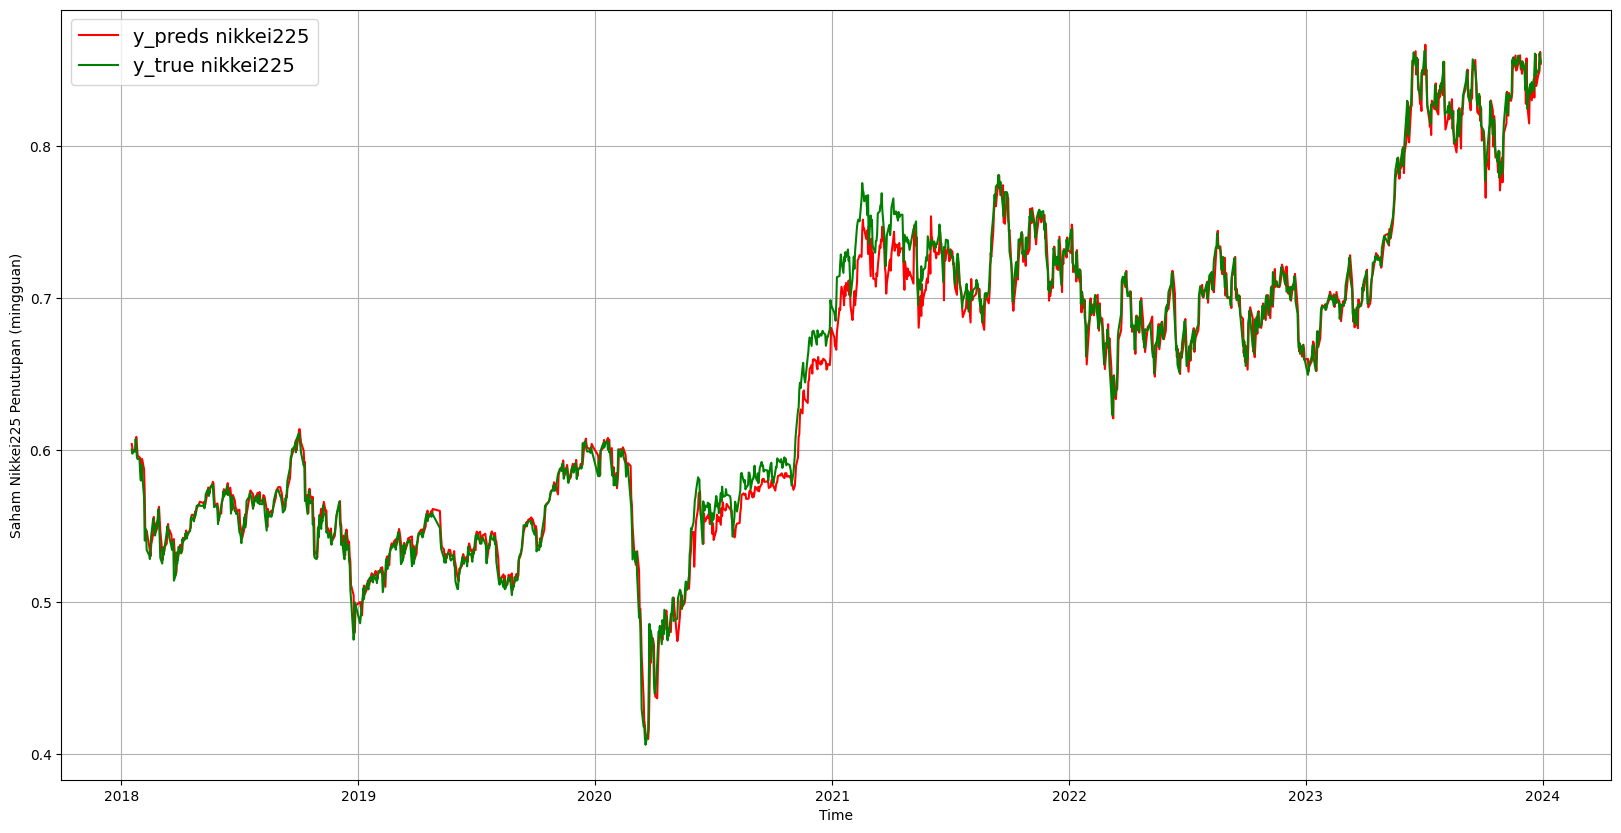

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_3_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/visualisasi_prediksi_time_series/model_3_plot_prediksi_stackedLSTM_multi.png')



simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model


# Save the model to disk as a .h5 file
save_model(model_3, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_3_stackedLSTM_multivariate.h5")

<ipython-input-490-e719b32b13f2>:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_3, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_3_stackedLSTM_multivariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_3 = load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_3_stackedLSTM_multivariate.h5")



# Model 4 : Bidirectional LSTM

In [ ]:
train_windows.shape[2]

3

## Tuner Builder

In [ ]:
def model_bidirectional_LSTM_multi_builder(hp):
  tf.random.set_seed(42)

  model_4 = tf.keras.models.Sequential([
          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = hp.Int('bi_lstm_n_units', min_value=32, max_value=256, step=32),
                                                            input_shape=(train_windows.shape[1], train_windows.shape[2]),
                                                            return_sequences = False,
                                                            activation = "relu")),
          #tf.keras.layers.Dropout(0.2, seed=42),
          #tf.keras.layers.LSTM(128, return_sequences = False, activation = "relu"),

          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(test_labels.shape[1])
          ], name = "model_4_bidirectionalLSTM_multivariate")



  #compile model 4
  model_4.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_4

In [ ]:
import keras_tuner as kt

tuner_bi_LSTM_multi = kt.Hyperband(model_bidirectional_LSTM_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs',
                     project_name='bi_LSTM_multivariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/bi_LSTM_multivariate/tuner0.json


## Proses tuning


In [ ]:
tuner_bi_LSTM_multi.search(train_windows,
                           train_labels,
                           epochs=10,
                           validation_data=(test_windows, test_labels),
                           batch_size = 128)

## Hasil parameter tuning terbaik

In [ ]:
tuner_bi_LSTM_multi.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_bi_LSTM_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ["bi_lstm_n_units", "merge_mode", 'learning_rate']
print('Best tune model bidirectional LSTM multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model bidirectional LSTM multivariate:
bi_lstm_n_units: 192
learning_rate: 0.01


## Hasil parameter tuning 10 terbaik

In [ ]:
tuning = ["bi_lstm_n_units", 'learning_rate']
top10_hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

top10_hps=tuner_bi_LSTM_multi.get_best_hyperparameters(num_trials=10)
for hps in top10_hps:
  for t in tuning:
    top10_hps_dict[t].append(hps.get(t))

df_top10 = pd.DataFrame(top10_hps_dict)
df_top10.to_csv('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/best_hyperparameter_models/hp_top10_bi_LSTM_multi.csv')

df_top10


bi_lstm_n_units  learning_rate
0              192         0.0100
1               96         0.0100
2              192         0.0100
3               64         0.0010
4              256         0.0001
5              256         0.0010
6              160         0.0001
7              256         0.0001
8              256         0.0010
9              256         0.0001

In [ ]:
tuner_bi_LSTM_multi.results_summary(num_trials=10)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/bi_LSTM_multivariate
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0024 summary
Hyperparameters:
bi_lstm_n_units: 192
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0023
Score: 0.004062175750732422

Trial 0028 summary
Hyperparameters:
bi_lstm_n_units: 96
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.005264888051897287

Trial 0023 summary
Hyperparameters:
bi_lstm_n_units: 192
learning_rate: 0.01
tuner/epochs: 4
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.005585554987192154

Trial 0027 summary
Hyperparameters:
bi_lstm_n_units: 64
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.006052517797797918

Trial 0016 summary
Hyperparameters:
bi_lstm_n_units: 256
learning_rate: 0.0001
tuner/epo

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_4 = tuner_bi_LSTM_multi.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_4 = load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_4_bidirectionalLSTM_multivariate.h5")

In [ ]:

# fit
history = model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_4.name)])

Epoch 1/50
 98/103 [===========================>..] - ETA: 0s - loss: 0.0388
Epoch 1: val_loss improved from inf to 0.01486, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_4_bidirectionalLSTM_multivariate
103/103 [==============================] - 11s 59ms/step - loss: 0.0375 - val_loss: 0.0149
Epoch 2/50
103/103 [==============================] - ETA: 0s - loss: 0.0102
Epoch 2: val_loss improved from 0.01486 to 0.00937, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_4_bidirectionalLSTM_multivariate
103/103 [==============================] - 6s 54ms/step - loss: 0.0102 - val_loss: 0.0094
Epoch 3/50
103/103 [==============================] - ETA: 0s - loss: 0.0092
Epoch 3: val_loss did not improve from 0.00937
103/103 [==============================] - 2s 16ms/step - loss: 0.0092 - val_loss: 0.0129
Epoch 4/50
 98/103 [===========================>..] - ETA: 0s - loss: 0.0076
Epoch 4: val_loss improv

visualisasi model shape

In [ ]:
model_4.summary()

Model: "model_4_bidirectionalLSTM_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirecti  (None, 64)                9216      
 onal)                                                           
                                                                 
 dense_17 (Dense)            (None, 3)                 195       
                                                                 
Total params: 9411 (36.76 KB)
Trainable params: 9411 (36.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


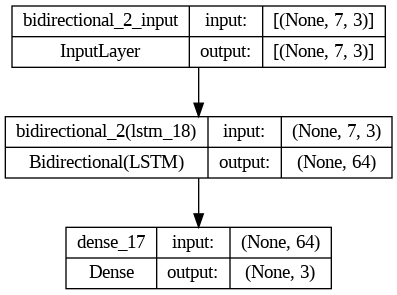

In [ ]:

from tensorflow.keras.utils import plot_model

plot_model(model_4, to_file='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_plot/model_biLSTM_multi_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

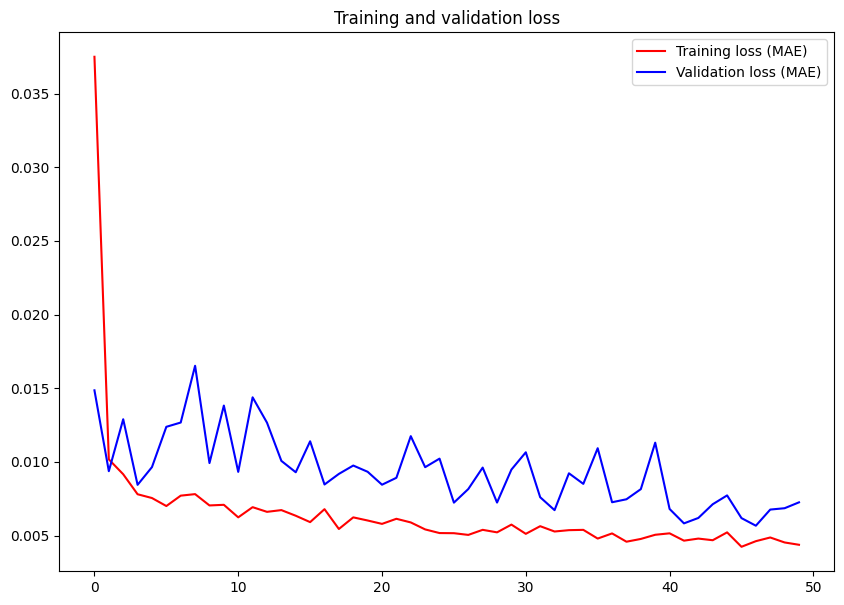

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.legend(loc=0)


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_loss_visualization/loss_bidirectional_LSTM_multi.png')




In [ ]:
# mengevaluasi model 4 dari epochs terakhir
model_4.evaluate(test_windows, test_labels)

46/46 [==============================] - 0s 3ms/step - loss: 0.0073


0.007258969359099865

In [ ]:
# mengevaluasi dan load model 4 pada best epoch yang loss mae paling kecil sepanjang training

model_4 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_4_bidirectionalLSTM_multivariate")
model_4.evaluate(test_windows, test_labels)


46/46 [==============================] - 1s 4ms/step - loss: 0.0057


0.005673171952366829

In [ ]:
# membuat predicted value berdasarkan model multivariate model_4 yang sudah di train

model_4_preds = tf.squeeze(model_4.predict(test_windows))
model_4_preds



46/46 [==============================] - 1s 4ms/step


<tf.Tensor: shape=(1456, 3), dtype=float32, numpy=
array([[0.602299  , 0.13342893, 0.02359605],
       [0.60027874, 0.13331956, 0.0233316 ],
       [0.59744686, 0.13319968, 0.02324556],
       ...,
       [0.84826624, 0.11464304, 0.03339943],
       [0.85928917, 0.11511636, 0.03415173],
       [0.853544  , 0.11499187, 0.03356924]], dtype=float32)>

In [ ]:
model_4_preds[:,2]

<tf.Tensor: shape=(1456,), dtype=float32, numpy=
array([0.02359605, 0.0233316 , 0.02324556, ..., 0.03339943, 0.03415173,
       0.03356924], dtype=float32)>

In [684]:
# mengukur predicted value ketiga time series dengan metrik evaluasi regresion problem

model_4_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_4_preds)

model_4_results["mae"]

0.005673172

In [671]:
# mengukur predicted value dari stock time series saja dengan metrik evaluasi regresion problem

model_4_results = evaluate_preds(y_true = test_labels[:, 0],
                                 y_pred = model_4_preds[:, 0])

model_4_results

{'mae': 0.0061786203,
 'mse': 6.8594374e-05,
 'rmse': 0.0082821725,
 'R-square': 0.9934078018805989}

In [ ]:
tf.squeeze(test_labels[:,0])

<tf.Tensor: shape=(1456,), dtype=float64, numpy=
array([0.60032696, 0.59753888, 0.59872588, ..., 0.86096453, 0.857203  ,
       0.85519899])>

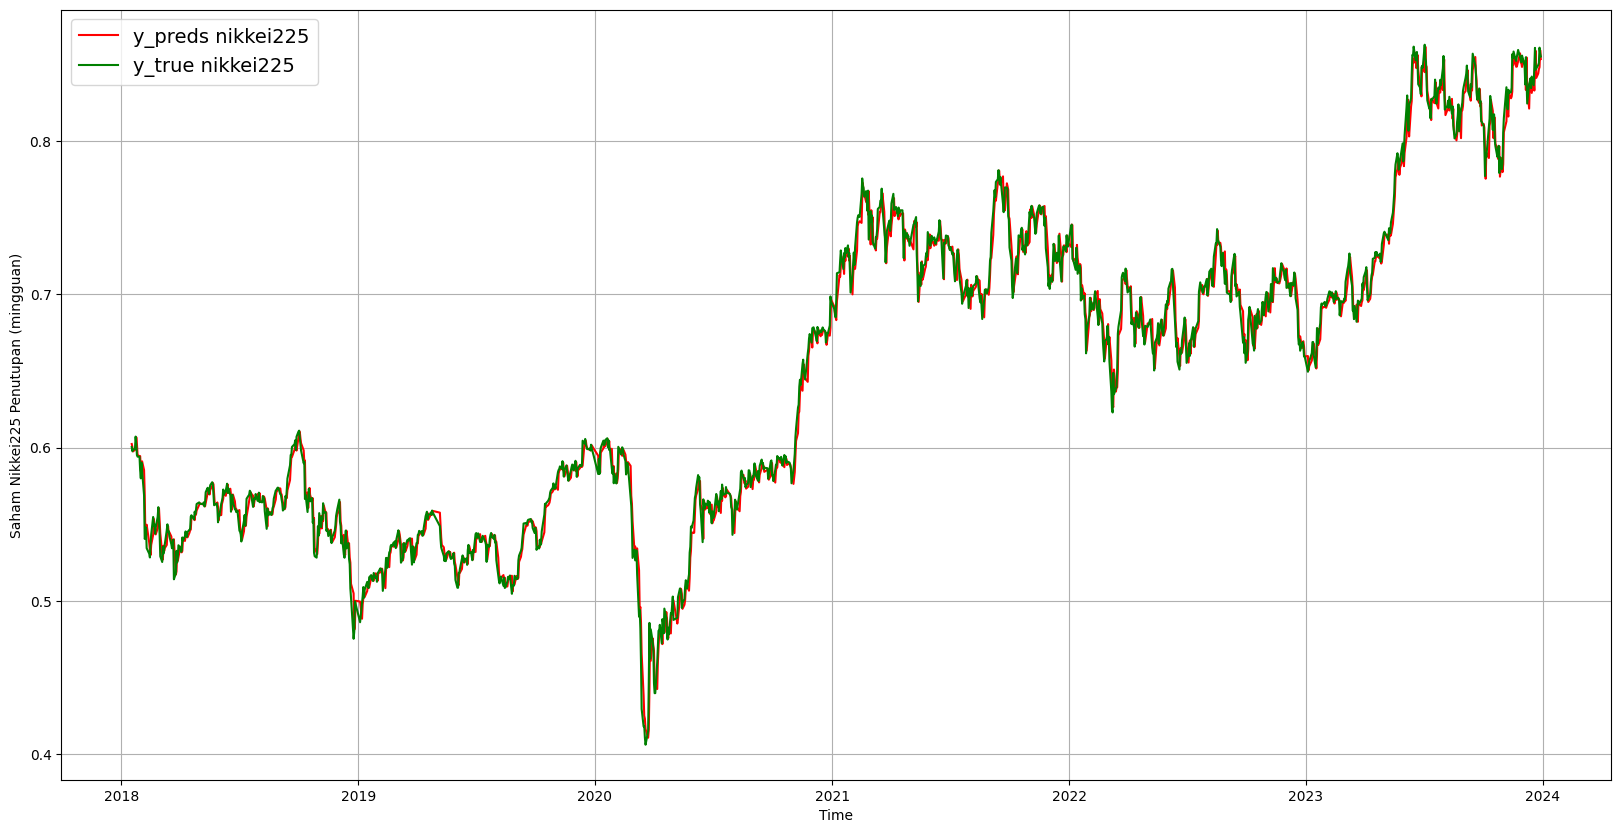

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_4_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/visualisasi_prediksi_time_series/model_4_plot_prediksi_biLSTM_multi.png')


simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model


# Save the model to disk as a .h5 file
save_model(model_4, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_4_bidirectionalLSTM_multivariate.h5")

<ipython-input-504-4db643018deb>:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_4, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_4_bidirectionalLSTM_multivariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_4 = load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_4_bidirectionalLSTM_multivariate.h5")

# Model 5 : CNN-LSTM

## Tuner Builder

In [ ]:
def model_CNN_LSTM_multi_builder(hp):
  tf.random.set_seed(42)

  model_5 = tf.keras.models.Sequential([
    # YOUR CODE HERE.
    tf.keras.layers.Conv1D(filters=hp.Int('Conv1D_n_filters', min_value=32, max_value=256, step=32),
                          kernel_size=hp.Int('Conv1D_kernel_size', min_value=5, max_value=10, step=1),
                          strides=1,
                          padding="causal",
                          activation="relu",
                          input_shape=[train_windows.shape[1], train_windows.shape[2]]),

    tf.keras.layers.LSTM(units = hp.Int('LSTM_n_units', min_value=32, max_value=256, step=32),
                        return_sequences=False),

    tf.keras.layers.Dense(test_labels.shape[1]),
    ], name = "model_5_CNN-LSTM_multivariate")


  #compile model 5
  model_5.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_5

In [ ]:
import keras_tuner as kt

tuner_CNN_LSTM_multi = kt.Hyperband(model_CNN_LSTM_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs',
                     project_name='CNN_LSTM_multivariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/CNN_LSTM_multivariate/tuner0.json


## Proses tuning


In [ ]:
tuner_CNN_LSTM_multi.search(train_windows,
                            train_labels,
                            epochs=10,
                            validation_data=(test_windows, test_labels),
                            batch_size = 128)

## Hasil parameter tuning terbaik

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_CNN_LSTM_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ['Conv1D_n_filters', 'Conv1D_kernel_size', "LSTM_n_units", 'learning_rate']
print('Best tune model CNN LSTM multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model CNN LSTM multivariate:
Conv1D_n_filters: 96
Conv1D_kernel_size: 5
LSTM_n_units: 224
learning_rate: 0.0001


## Hasil parameter tuning 10 terbaik

In [ ]:
tuning = ['Conv1D_n_filters', 'Conv1D_kernel_size', "LSTM_n_units", 'learning_rate']
top10_hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

top10_hps=tuner_CNN_LSTM_multi.get_best_hyperparameters(num_trials=10)
for hps in top10_hps:
  for t in tuning:
    top10_hps_dict[t].append(hps.get(t))

df_top10 = pd.DataFrame(top10_hps_dict)
df_top10.to_csv('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/best_hyperparameter_models/hp_top10_CNN_LSTM_multi.csv')
df_top10


Conv1D_n_filters  Conv1D_kernel_size  LSTM_n_units  learning_rate
0                96                   5           224         0.0001
1               192                   8           256         0.0001
2               160                   5           192         0.0001
3               192                   6           256         0.0001
4               160                   5           192         0.0001
5               192                   6           256         0.0001
6               256                   9           192         0.0001
7                96                  10           224         0.0001
8               256                   9           256         0.0001
9               192                   8           256         0.0001

In [ ]:
tuner_CNN_LSTM_multi.results_summary(num_trials=10)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/CNN_LSTM_multivariate
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0029 summary
Hyperparameters:
Conv1D_n_filters: 96
Conv1D_kernel_size: 5
LSTM_n_units: 224
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.004766636528074741

Trial 0016 summary
Hyperparameters:
Conv1D_n_filters: 192
Conv1D_kernel_size: 8
LSTM_n_units: 256
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.004994381684809923

Trial 0024 summary
Hyperparameters:
Conv1D_n_filters: 160
Conv1D_kernel_size: 5
LSTM_n_units: 192
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0021
Score: 0.0051344712264835835

Trial 0025 summary
Hyperparameters:
Conv1D_n_filters: 192
Conv1D_kernel_size: 6
LSTM_n_units: 256
learning_rate: 

## Mengimplementasikan hyperparameter terbaik ke model

In [514]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_5 = tuner_CNN_LSTM_multi.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_5 = load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_5_CNN-LSTM_multivariate.h5")


In [515]:

# fit
history = model_5.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/50
101/103 [============================>.] - ETA: 0s - loss: 0.0422
Epoch 1: val_loss improved from inf to 0.01999, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_5_CNN-LSTM_multivariate
103/103 [==============================] - 14s 91ms/step - loss: 0.0418 - val_loss: 0.0200
Epoch 2/50
102/103 [============================>.] - ETA: 0s - loss: 0.0148
Epoch 2: val_loss improved from 0.01999 to 0.01322, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_5_CNN-LSTM_multivariate
103/103 [==============================] - 6s 62ms/step - loss: 0.0148 - val_loss: 0.0132
Epoch 3/50
101/103 [============================>.] - ETA: 0s - loss: 0.0135
Epoch 3: val_loss did not improve from 0.01322
103/103 [==============================] - 2s 24ms/step - loss: 0.0134 - val_loss: 0.0187
Epoch 4/50
103/103 [==============================] - ETA: 0s - loss: 0.0098
Epoch 4: val_loss did not improve from 0.0

visualisasi model shape

In [516]:
model_5.summary()

Model: "model_5_CNN-LSTM_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 7, 256)            4096      
                                                                 
 lstm_20 (LSTM)              (None, 64)                82176     
                                                                 
 dense_19 (Dense)            (None, 3)                 195       
                                                                 
Total params: 86467 (337.76 KB)
Trainable params: 86467 (337.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


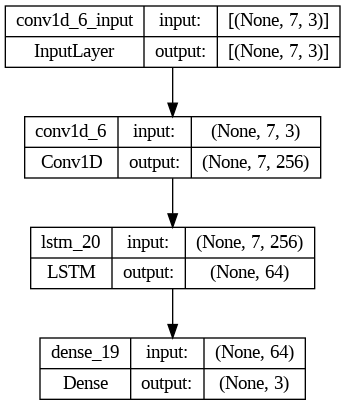

In [517]:
from tensorflow.keras.utils import plot_model

plot_model(model_5, to_file='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_plot/model_CNN-LSTM_multi_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

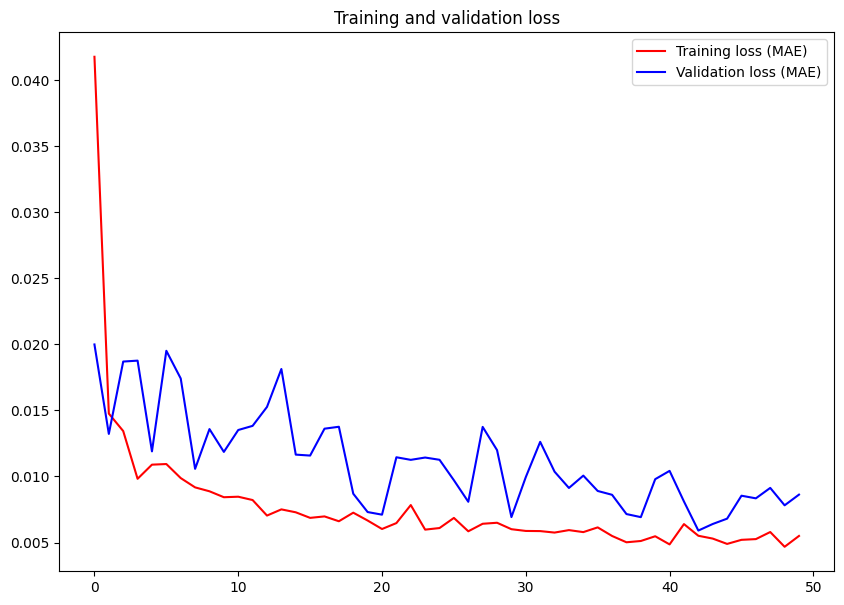

In [518]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.legend(loc=0)



# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_loss_visualization/loss_CNN-LSTM_multi.png')


In [519]:
# mengevaluasi model 6 dari epochs terakhir
model_5.evaluate(test_windows, test_labels)

46/46 [==============================] - 0s 8ms/step - loss: 0.0086


0.008624804206192493

In [520]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_5 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_5_CNN-LSTM_multivariate")
model_5.evaluate(test_windows, test_labels)


46/46 [==============================] - 1s 5ms/step - loss: 0.0059


0.005905067082494497

In [521]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_5_preds = tf.squeeze(model_5.predict(test_windows))
model_5_preds



46/46 [==============================] - 1s 5ms/step


<tf.Tensor: shape=(1456, 3), dtype=float32, numpy=
array([[0.6073632 , 0.13367675, 0.02073705],
       [0.6056648 , 0.13329168, 0.02064225],
       [0.60286164, 0.13340652, 0.02063799],
       ...,
       [0.8459157 , 0.10567173, 0.03266302],
       [0.8515458 , 0.10705382, 0.03345929],
       [0.8509112 , 0.10599238, 0.03294429]], dtype=float32)>

In [522]:
model_5_preds[:,2]

<tf.Tensor: shape=(1456,), dtype=float32, numpy=
array([0.02073705, 0.02064225, 0.02063799, ..., 0.03266302, 0.03345929,
       0.03294429], dtype=float32)>

In [685]:
# mengukur predicted value ketiga time series dengan metrik evaluasi regresion problem

model_5_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_5_preds)

model_5_results['mae']

0.0059050675

In [524]:
# mengukur predicted value ketiga time series dengan metrik evaluasi regresion problem

model_5_results = evaluate_preds(y_true = test_labels[:, 0],
                                 y_pred = model_5_preds[:, 0])

model_5_results

{'mae': 0.0073344484,
 'mse': 9.124796e-05,
 'rmse': 0.00955238,
 'R-square': 0.9912307001048639}

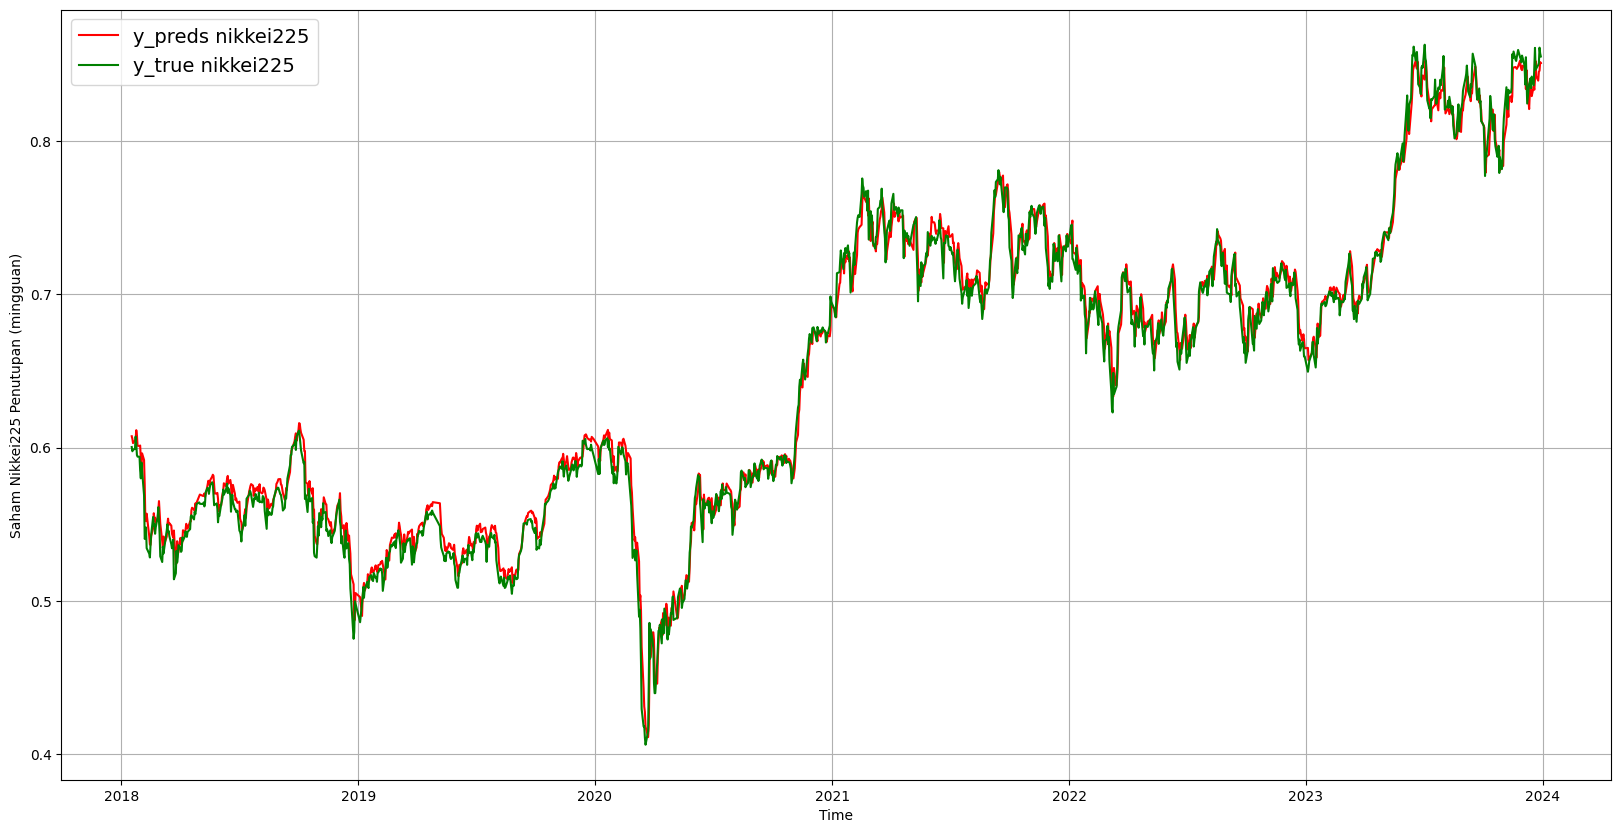

In [525]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_5_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/visualisasi_prediksi_time_series/model_5_plot_prediksi_CNN-LSTM_multi.png')


simpan model trained ke bentuk .h5

In [526]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_5, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_5_CNN-LSTM_multivariate.h5")


<ipython-input-526-75318a663feb>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_5, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_5_CNN-LSTM_multivariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_5 = load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_5_CNN-LSTM_multivariate.h5")


# Membuat univariate time series forecasting stock price

In [ ]:
print(full_windows[:, 0]),
print(full_windows[:, 0].shape)
print("\n")
print(full_labels[:, 0])
print(full_labels[:, 0].shape)

[[0.00000000e+00 5.60137457e-01 6.86516854e-01]
 [4.27892992e-04 5.60137457e-01 6.86516854e-01]
 [3.85395861e-04 5.60137457e-01 6.86516854e-01]
 ...
 [8.36468648e-01 9.96563574e-02 2.24719101e-02]
 [8.48697463e-01 9.96563574e-02 2.24719101e-02]
 [8.60823754e-01 9.96563574e-02 2.24719101e-02]]
(14621, 3)


[0.00128023 0.0013862  0.00129377 ... 0.86096453 0.857203   0.85519899]
(14621,)


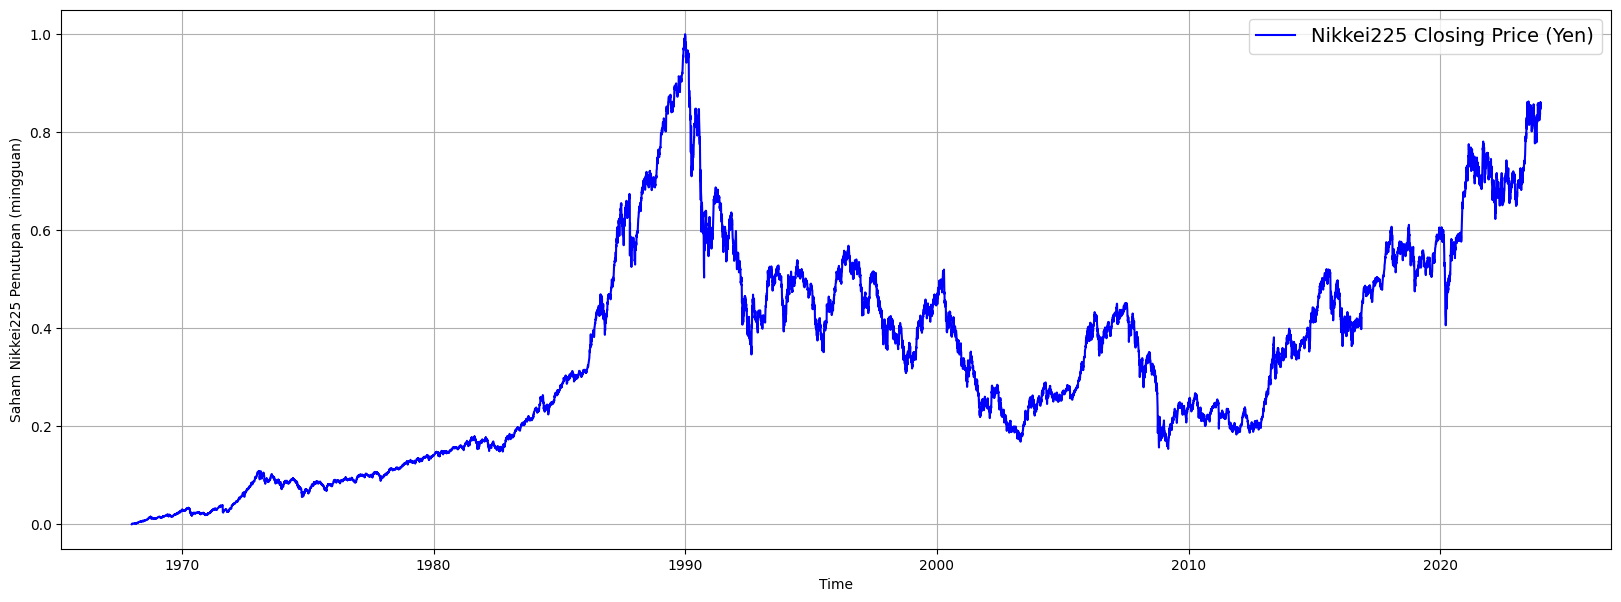

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,0], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')

memanggil variabel window dan label untuk univariate nikkei stock price

In [ ]:
X_nikkei.shape, y_nikkei.shape

((14621, 7, 1), (14621, 1, 1))

reshape dimensi X_nikkei dan y_nikkei dan masukkan ke variabel baru

In [ ]:
train_nikkeiWindows = np.squeeze(X_nikkei[:train_size])
test_nikkeiWindows = np.squeeze(X_nikkei[train_size:])

train_nikkeiLabels = np.squeeze(y_nikkei[:train_size])
test_nikkeiLabels = np.squeeze(y_nikkei[train_size:])

In [ ]:
train_nikkeiWindows.shape, test_nikkeiWindows.shape

((13165, 7), (1456, 7))

In [ ]:
train_nikkeiWindows.shape[1]

7

In [ ]:
train_nikkeiLabels.shape, test_nikkeiLabels.shape

((13165,), (1456,))

# Model 6: Conv1D Univariate

In [ ]:
train_nikkeiWindows.shape

(13165, 7)

## Tuner Builder

In [ ]:
#create Conv1D model
def model_Conv1D_uni_builder(hp):
  tf.random.set_seed(42)

  model_6 = tf.keras.models.Sequential([
      #layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
      tf.keras.layers.Conv1D(filters = hp.Int('conv1D_n_filters', min_value=32, max_value=256, step=32),
                             kernel_size = hp.Int('conv1D_kernel_size', min_value=5, max_value=10, step=1),
                             strides = 1,
                             padding ="causal",
                             input_shape = (WINDOW_SIZE, 1)),
      tf.keras.layers.GlobalMaxPooling1D(),  # Add GlobalMaxPooling1D layer
      tf.keras.layers.Dense(1)

      #filters adalah jumlah hidden unit dalam layers tersebut
      # kernel size adalah ukuran dari window. Ex: kernel_size = 7 artinya melihat 7 value sekaligus
      # default nilai strides = 1, ini sudah sesuai karena sliding window bergeser satu timesteps
  ], name = "model_6_conv1D_univariate")

  #compile model 1
  model_6.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_6

In [ ]:
import keras_tuner as kt

tuner_Conv1D_uni = kt.Hyperband(model_Conv1D_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs',
                     project_name='Conv1D_univariate')



Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/Conv1D_univariate/tuner0.json


## Proses tuning


In [ ]:
tuner_Conv1D_uni.search(train_nikkeiWindows,
                        train_nikkeiLabels,
                        epochs=10,
                        validation_data=(test_nikkeiWindows, test_nikkeiLabels),
                        batch_size=128)

## Hasil parameter tuning terbaik

In [ ]:
tuner_Conv1D_uni.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_Conv1D_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ['conv1D_n_filters', 'conv1D_kernel_size', 'learning_rate']
print('Best tune model Conv1D univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model Conv1D univariate:
conv1D_n_filters: 160
conv1D_kernel_size: 7
learning_rate: 0.001


## Hasil parameter tuning 10 terbaik

In [ ]:
tuning =['conv1D_n_filters', 'conv1D_kernel_size', 'learning_rate']
top10_hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

top10_hps = tuner_Conv1D_uni.get_best_hyperparameters(num_trials=10)
for hps in top10_hps:
  for t in tuning:
    top10_hps_dict[t].append(hps.get(t))

df_top10 = pd.DataFrame(top10_hps_dict)
df_top10.to_csv('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/best_hyperparameter_models/hp_top10_Con1D_uni.csv')
df_top10



conv1D_n_filters  conv1D_kernel_size  learning_rate
0               160                   7         0.0010
1                96                   9         0.0100
2               192                   9         0.0100
3                96                   9         0.0100
4                32                   6         0.0100
5                64                   5         0.0010
6               256                   6         0.0100
7               160                   7         0.0010
8                32                   6         0.0100
9                32                   9         0.0001

In [ ]:
tuner_Conv1D_uni.results_summary(num_trials=10)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/Conv1D_univariate
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0016 summary
Hyperparameters:
conv1D_n_filters: 160
conv1D_kernel_size: 7
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0015
Score: 0.006991326343268156

Trial 0024 summary
Hyperparameters:
conv1D_n_filters: 96
conv1D_kernel_size: 9
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0018
Score: 0.00710955960676074

Trial 0029 summary
Hyperparameters:
conv1D_n_filters: 192
conv1D_kernel_size: 9
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.007616096641868353

Trial 0018 summary
Hyperparameters:
conv1D_n_filters: 96
conv1D_kernel_size: 9
learning_rate: 0.01
tuner/epochs: 4
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0

## Mengimplementasikan hyperparameter terbaik ke model

In [527]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_6 = tuner_Conv1D_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_6 = load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_6_Conv1D_univariate.h5")


In [528]:

# fit
history = model_6.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_6.name)])

Epoch 1/50
 97/103 [===========================>..] - ETA: 0s - loss: 0.0279
Epoch 1: val_loss improved from inf to 0.01406, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_6_conv1D_univariate
103/103 [==============================] - 2s 9ms/step - loss: 0.0267 - val_loss: 0.0141
Epoch 2/50
 98/103 [===========================>..] - ETA: 0s - loss: 0.0080
Epoch 2: val_loss improved from 0.01406 to 0.01303, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_6_conv1D_univariate
103/103 [==============================] - 1s 9ms/step - loss: 0.0080 - val_loss: 0.0130
Epoch 3/50
 99/103 [===========================>..] - ETA: 0s - loss: 0.0069
Epoch 3: val_loss improved from 0.01303 to 0.01142, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_6_conv1D_univariate
103/103 [==============================] - 1s 8ms/step - loss: 0.0069 - val_loss: 0.0114
Epoch 4/50
100

visualisasi model shape

In [529]:
model_6.summary()

Model: "model_6_conv1D_univariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 7, 32)             192       
                                                                 
 global_max_pooling1d_3 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 225 (900.00 Byte)
Trainable params: 225 (900.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


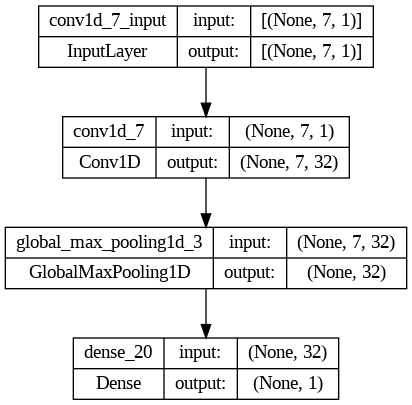

In [530]:
from tensorflow.keras.utils import plot_model

plot_model(model_6, to_file='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_plot/model_Conv1D_uni_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

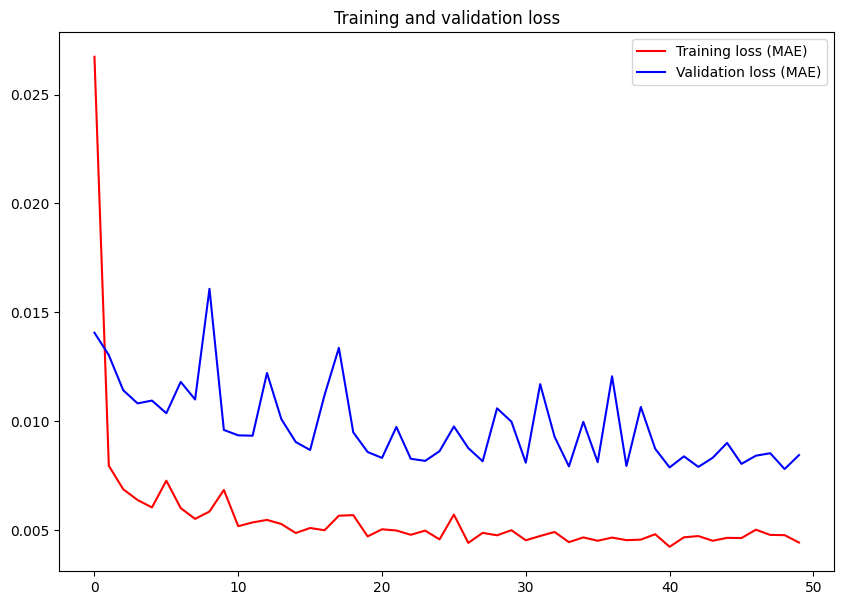

In [531]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.legend(loc=0)



# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_loss_visualization/loss_Conv1D_uni.png')


In [532]:
# mengevaluasi model 6 dari epochs terakhir
model_6.evaluate(test_nikkeiWindows, test_nikkeiLabels)

46/46 [==============================] - 0s 2ms/step - loss: 0.0084


0.008441291749477386

In [533]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_6 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_6_conv1D_univariate")
model_6.evaluate(test_nikkeiWindows, test_nikkeiLabels)


46/46 [==============================] - 0s 2ms/step - loss: 0.0078


0.007800985127687454

In [534]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_6_preds = tf.squeeze(model_6.predict(test_nikkeiWindows))
model_6_preds



46/46 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(1456,), dtype=float32, numpy=
array([0.59923583, 0.59953195, 0.60045516, ..., 0.85064214, 0.85576344,
       0.85600877], dtype=float32)>

In [535]:
model_6_preds[:2]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.59923583, 0.59953195], dtype=float32)>

In [536]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_6_results = evaluate_preds(y_true = test_nikkeiLabels,
                                 y_pred = model_6_preds)

model_6_results

{'mae': 0.007800987,
 'mse': 0.00011666023,
 'rmse': 0.010800936,
 'R-square': 0.9887884776615954}

In [537]:
tf.squeeze(test_nikkeiLabels)

<tf.Tensor: shape=(1456,), dtype=float64, numpy=
array([0.60032696, 0.59753888, 0.59872588, ..., 0.86096453, 0.857203  ,
       0.85519899])>

In [538]:
test_nikkeiLabels

array([0.60032696, 0.59753888, 0.59872588, ..., 0.86096453, 0.857203  ,
       0.85519899])

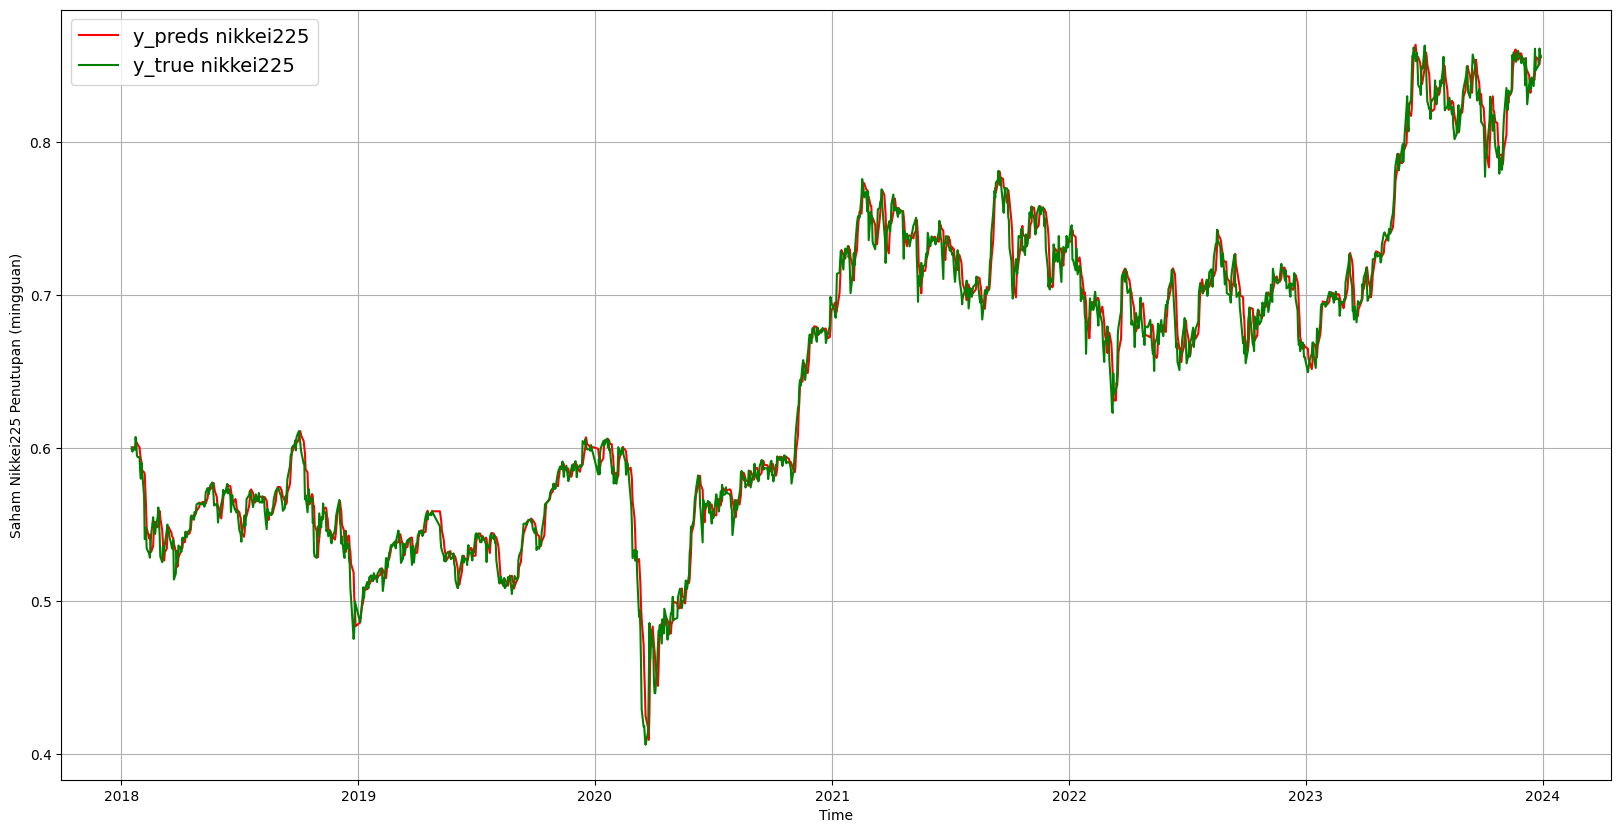

In [539]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_6_preds, format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_nikkeiLabels, format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/visualisasi_prediksi_time_series/model_6_plot_prediksi_Conv1D_uni.png')


In [540]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_6, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_6_Conv1D_univariate.h5")


<ipython-input-540-2928a94df703>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_6, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_6_Conv1D_univariate.h5")


In [541]:
from tensorflow.keras.models import load_model

# Load the saved model
model_6 = load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_6_Conv1D_univariate.h5")


# Model 7: LSTM Univariate

## Tuner Builder

In [ ]:
# membuat model LSTM dengan hyperparameter tuning

def model_LSTM_uni_builder(hp):
  tf.random.set_seed(42)

  model_7 = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(units = hp.Int('lstm_n_units', min_value=32, max_value=256, step=32),
                               input_shape=(WINDOW_SIZE, 1),
                               return_sequences = False,
                               activation = "relu"),
          #tf.keras.layers.Dropout(0.2),
          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(1, activation = "relu")
          ], name = "model_7_LSTM_univariate")



  #compile model 2
  model_7.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_7

In [ ]:
import keras_tuner as kt

tuner_LSTM_uni = kt.Hyperband(model_LSTM_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs',
                     project_name='LSTM_univariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/LSTM_univariate/tuner0.json


## Proses tuning


In [ ]:
tuner_LSTM_uni.search(train_nikkeiWindows,
                      train_nikkeiLabels,
                      epochs=10,
                      validation_data=(test_nikkeiWindows, test_nikkeiLabels),
                      batch_size = 128)

## Hasil parameter tuning terbaik

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_LSTM_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ['lstm_n_units', 'learning_rate']
print('Best tune model LSTM univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model LSTM univariate:
lstm_n_units: 256
learning_rate: 0.01


## Hasil parameter tuning 10 terbaik

In [ ]:
tuning =['lstm_n_units', 'learning_rate']
top10_hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

top10_hps=tuner_LSTM_uni.get_best_hyperparameters(num_trials=10)
for hps in top10_hps:
  for t in tuning:
    top10_hps_dict[t].append(hps.get(t))

df_top10 = pd.DataFrame(top10_hps_dict)
df_top10.to_csv('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/best_hyperparameter_models/hp_top10_LSTM_uni.csv')
df_top10


lstm_n_units  learning_rate
0           256         0.0100
1            64         0.0100
2            32         0.0100
3            64         0.0100
4            32         0.0010
5            32         0.0010
6           256         0.0100
7            64         0.0010
8            32         0.0010
9            96         0.0001

In [ ]:
tuner_LSTM_uni.results_summary(num_trials=10)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/LSTM_univariate
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0025 summary
Hyperparameters:
lstm_n_units: 256
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0020
Score: 0.007123366929590702

Trial 0024 summary
Hyperparameters:
lstm_n_units: 64
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0018
Score: 0.007844574749469757

Trial 0000 summary
Hyperparameters:
lstm_n_units: 32
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.008294574916362762

Trial 0018 summary
Hyperparameters:
lstm_n_units: 64
learning_rate: 0.01
tuner/epochs: 4
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.008724555373191833

Trial 0016 summary
Hyperparameters:
lstm_n_units: 32
learning_rate: 0.001
tuner/epochs:

## Mengimplementasikan hyperparameter terbaik ke model

In [610]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_7 = tuner_LSTM_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_7 = load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_7_LSTM_univariate.h5")


In [611]:

# fit
history = model_7.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_7.name)])

Epoch 1/50
 94/103 [==========================>...] - ETA: 0s - loss: 0.0356
Epoch 1: val_loss improved from inf to 0.00989, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_7_LSTM_univariate
103/103 [==============================] - 4s 25ms/step - loss: 0.0331 - val_loss: 0.0099
Epoch 2/50
 97/103 [===========================>..] - ETA: 0s - loss: 0.0062
Epoch 2: val_loss improved from 0.00989 to 0.00918, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_7_LSTM_univariate
103/103 [==============================] - 2s 23ms/step - loss: 0.0062 - val_loss: 0.0092
Epoch 3/50
 98/103 [===========================>..] - ETA: 0s - loss: 0.0066
Epoch 3: val_loss improved from 0.00918 to 0.00885, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_7_LSTM_univariate
103/103 [==============================] - 3s 32ms/step - loss: 0.0066 - val_loss: 0.0088
Epoch 4/50
103/10

visualisasi model shape

In [612]:
model_7.summary()

Model: "model_7_LSTM_univariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 32)                4352      
                                                                 
 dense_26 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4385 (17.13 KB)
Trainable params: 4385 (17.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


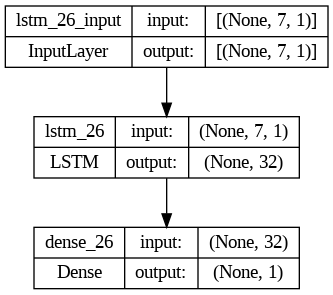

In [613]:
from tensorflow.keras.utils import plot_model

plot_model(model_7, to_file='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_plot/model_LSTM_uni_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

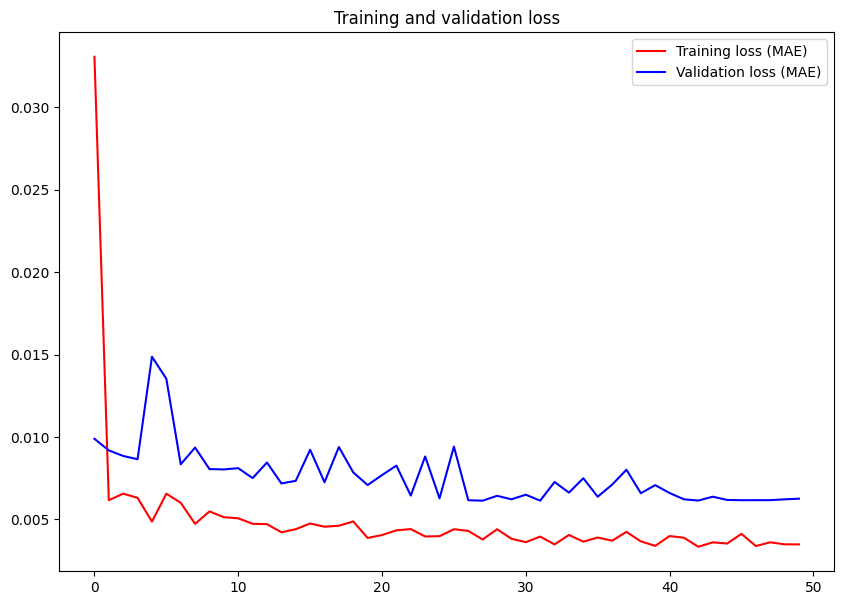

In [614]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.legend(loc=0)



# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_loss_visualization/loss_LSTM_uni.png')



In [615]:
# mengevaluasi model 7 dari epochs terakhir
model_7.evaluate(test_nikkeiWindows, test_nikkeiLabels)

46/46 [==============================] - 0s 2ms/step - loss: 0.0063


0.006255995016545057

In [616]:
# mengevaluasi dan load model 7 pada best epoch yang loss mae paling kecil sepanjang training

model_7 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_7_LSTM_univariate")
model_7.evaluate(test_nikkeiWindows, test_nikkeiLabels)


46/46 [==============================] - 0s 2ms/step - loss: 0.0061


0.006136411335319281

In [617]:
# membuat predicted value berdasarkan model multivariate model_7 yang sudah di train

model_7_preds = tf.squeeze(model_7.predict(test_nikkeiWindows))
model_7_preds



46/46 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(1456,), dtype=float32, numpy=
array([0.60147387, 0.60001284, 0.5977349 , ..., 0.85073733, 0.8604425 ,
       0.8563377 ], dtype=float32)>

In [618]:
model_7_preds[:2]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.60147387, 0.60001284], dtype=float32)>

In [619]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_7_results = evaluate_preds(y_true = test_nikkeiLabels,
                                 y_pred = model_7_preds)

model_7_results

{'mae': 0.006136411,
 'mse': 6.7916495e-05,
 'rmse': 0.008241147,
 'R-square': 0.9934729482533422}

In [620]:
tf.squeeze(test_nikkeiLabels[:])

<tf.Tensor: shape=(1456,), dtype=float64, numpy=
array([0.60032696, 0.59753888, 0.59872588, ..., 0.86096453, 0.857203  ,
       0.85519899])>

In [621]:
test_nikkeiLabels[:]

array([0.60032696, 0.59753888, 0.59872588, ..., 0.86096453, 0.857203  ,
       0.85519899])

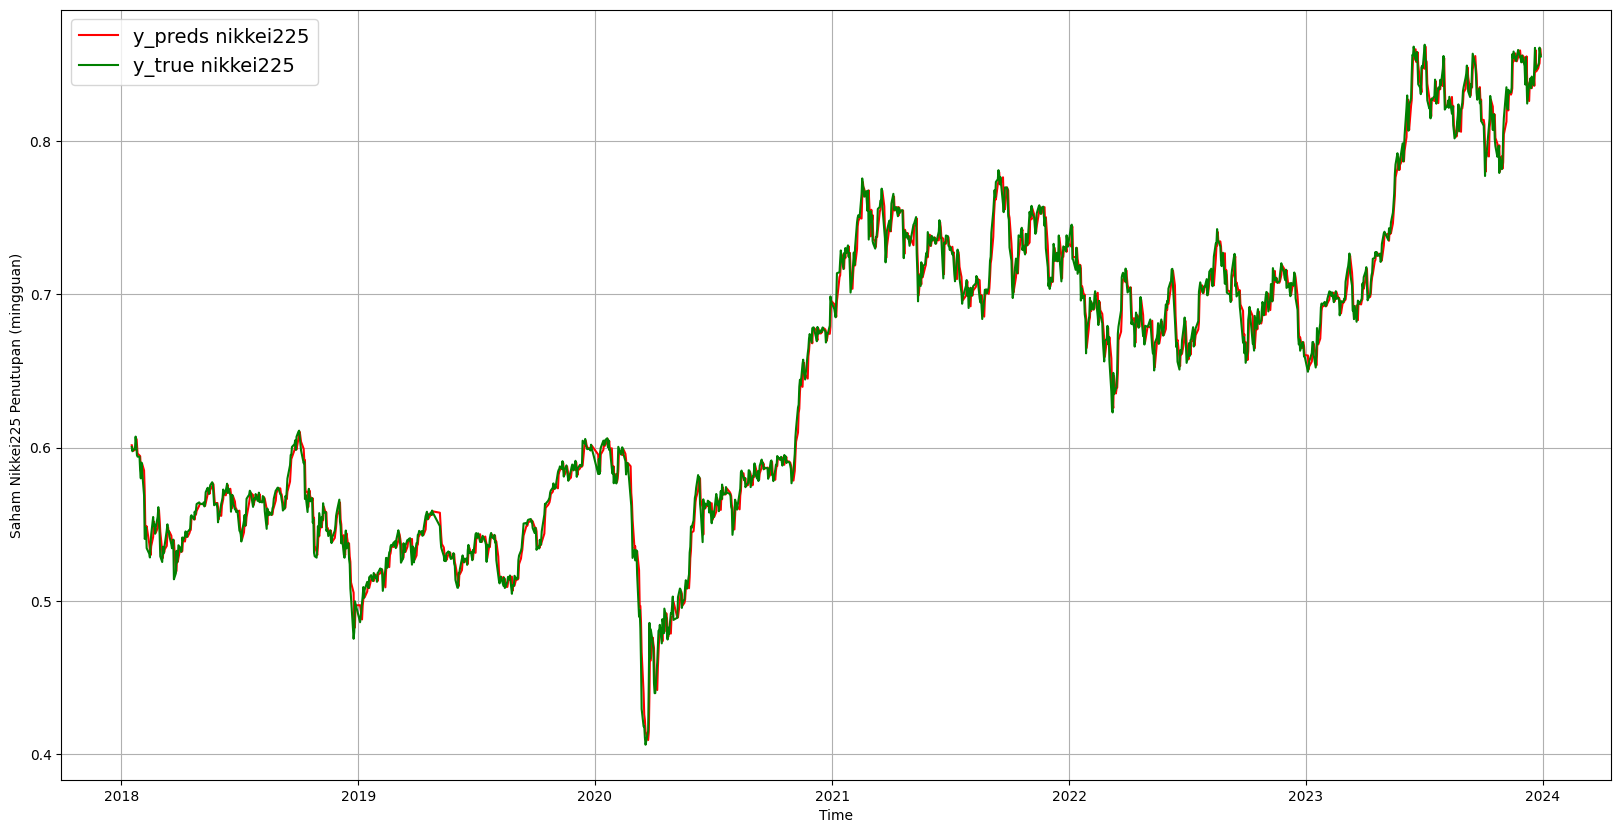

In [622]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_7_preds, format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_nikkeiLabels, format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/visualisasi_prediksi_time_series/model_7_plot_prediksi_LSTM_uni.png')


simpan model trained ke bentuk h5.

In [623]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_7, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_7_LSTM_univariate.h5")


<ipython-input-623-1f16d1a27055>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_7, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_7_LSTM_univariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_7 = load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_7_LSTM_univariate.h5")


 # Model 8 : Stacked LSTM univariate

## Tuner builder

In [ ]:
# membuat model LSTM dengan hyperparameter tuning
def model_stackedLSTM_uni_builder(hp):

  tf.random.set_seed(42)
  model_8 = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(units =  hp.Int('lstm_n_units', min_value=32, max_value=256, step=32),
                              input_shape=(WINDOW_SIZE, 1),
                              return_sequences = True,
                              activation = "relu"),

          #tf.keras.layers.Dropout(0.2, seed=42),
          tf.keras.layers.LSTM(units = hp.Int('lstm_n_units_2', min_value=32, max_value=256, step=32),
                              return_sequences = False,
                              activation = "relu"),

          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(1)
          ], name = "model_8_stackedLSTM_univariate")


  #compile model 8
  model_8.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_8

In [ ]:
import keras_tuner as kt

tuner_stackedLSTM_uni = kt.Hyperband(model_stackedLSTM_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs',
                     project_name='stackedLSTM_univariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/stackedLSTM_univariate/tuner0.json


## Proses tuning


In [ ]:
tuner_stackedLSTM_uni.search(train_nikkeiWindows,
                             train_nikkeiLabels,
                             epochs=10,
                             validation_data=(test_nikkeiWindows, test_nikkeiLabels),
                             batch_size = 128)

## Hasil parameter tuning terbaik

In [ ]:
# Get the optimal hyperparameters
best_hps = tuner_stackedLSTM_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ['lstm_n_units', "lstm_n_units_2", 'learning_rate']
print('Best tune model stacked LSTM univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model stacked LSTM univariate:
lstm_n_units: 192
lstm_n_units_2: 32
learning_rate: 0.01


## Hasil parameter tuning 10 terbaik

In [ ]:
tuning = ['lstm_n_units', "lstm_n_units_2", 'learning_rate']
top10_hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

top10_hps = tuner_stackedLSTM_uni.get_best_hyperparameters(num_trials=10)
for hps in top10_hps:
  for t in tuning:
    top10_hps_dict[t].append(hps.get(t))

df_top10 = pd.DataFrame(top10_hps_dict)
df_top10.to_csv('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/best_hyperparameter_models/hp_top10_Stacked_LSTM_uni.csv')
df_top10


lstm_n_units  lstm_n_units_2  learning_rate
0           192              32          0.010
1           224              32          0.010
2            64             224          0.010
3            64             128          0.010
4           128             128          0.001
5            64             128          0.010
6            64             224          0.010
7           160             128          0.001
8            64              64          0.001
9            64              64          0.001

In [ ]:
tuner_stackedLSTM_uni.results_summary(num_trials=10)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/stackedLSTM_univariate
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0029 summary
Hyperparameters:
lstm_n_units: 192
lstm_n_units_2: 32
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.008427570573985577

Trial 0027 summary
Hyperparameters:
lstm_n_units: 224
lstm_n_units_2: 32
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.008436692878603935

Trial 0025 summary
Hyperparameters:
lstm_n_units: 64
lstm_n_units_2: 224
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0020
Score: 0.009156044572591782

Trial 0024 summary
Hyperparameters:
lstm_n_units: 64
lstm_n_units_2: 128
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0019
Score: 0.009512788616120815


## Mengimplementasikan hyperparameter terbaik ke model

In [624]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_8 = tuner_stackedLSTM_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_8 = load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_8_stackedLSTM_univariate.h5")


In [625]:

# fit
history = model_8.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_8.name)])

Epoch 1/50
100/103 [============================>.] - ETA: 0s - loss: 0.0372
Epoch 1: val_loss improved from inf to 0.01460, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_8_stackedLSTM_univariate
103/103 [==============================] - 8s 54ms/step - loss: 0.0365 - val_loss: 0.0146
Epoch 2/50
101/103 [============================>.] - ETA: 0s - loss: 0.0104
Epoch 2: val_loss did not improve from 0.01460
103/103 [==============================] - 1s 11ms/step - loss: 0.0104 - val_loss: 0.0226
Epoch 3/50
 99/103 [===========================>..] - ETA: 0s - loss: 0.0075
Epoch 3: val_loss did not improve from 0.01460
103/103 [==============================] - 1s 11ms/step - loss: 0.0075 - val_loss: 0.0151
Epoch 4/50
 99/103 [===========================>..] - ETA: 0s - loss: 0.0086
Epoch 4: val_loss did not improve from 0.01460
103/103 [==============================] - 1s 11ms/step - loss: 0.0086 - val_loss: 0.0149
Epoch 5/50
 99/103 [======

visualisasi model shape

In [626]:
model_8.summary()

Model: "model_8_stackedLSTM_univariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 7, 32)             4352      
                                                                 
 lstm_28 (LSTM)              (None, 32)                8320      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12705 (49.63 KB)
Trainable params: 12705 (49.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


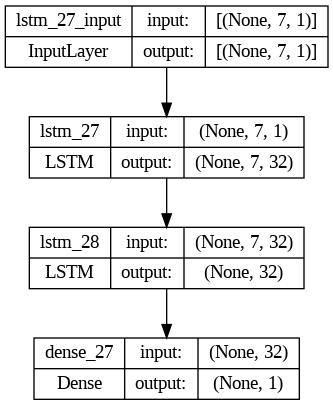

In [627]:
from tensorflow.keras.utils import plot_model

plot_model(model_8, to_file='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_plot/model_stackedLSTM_uni_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

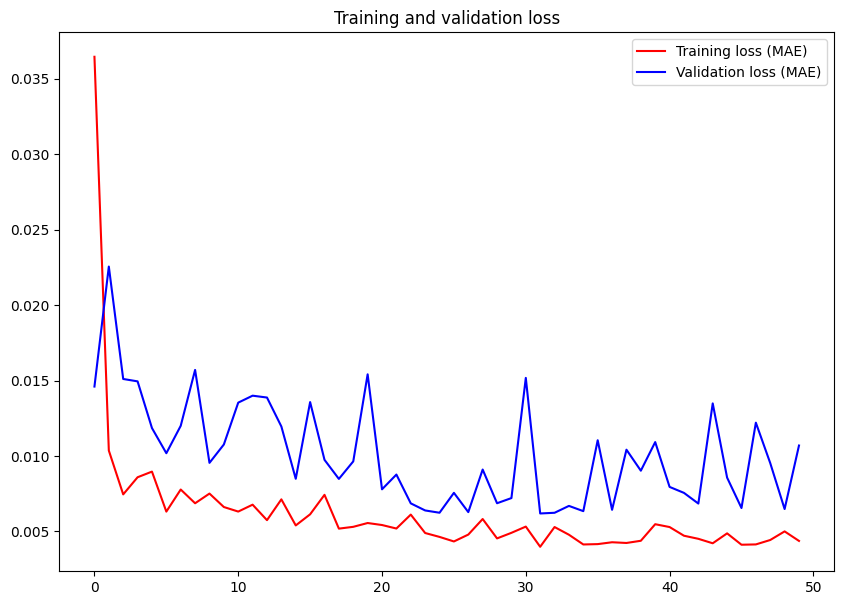

In [628]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.legend(loc=0)


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_loss_visualization/loss_stackedLSTM_uni.png')



In [629]:
# mengevaluasi model 8 dari epochs terakhir
model_8.evaluate(test_nikkeiWindows, test_nikkeiLabels)

46/46 [==============================] - 0s 3ms/step - loss: 0.0107


0.01069095078855753

In [630]:
# mengevaluasi dan load model 8 pada best epoch yang loss mae paling kecil sepanjang training

model_8 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_8_stackedLSTM_univariate")
model_8.evaluate(test_nikkeiWindows, test_nikkeiLabels)



46/46 [==============================] - 1s 3ms/step - loss: 0.0062


0.006187794730067253

In [631]:
# membuat predicted value berdasarkan model multivariate model_8 yang sudah di train

model_8_preds = tf.squeeze(model_8.predict(test_nikkeiWindows))
model_8_preds



46/46 [==============================] - 1s 4ms/step


<tf.Tensor: shape=(1456,), dtype=float32, numpy=
array([0.60299325, 0.6003578 , 0.59756213, ..., 0.8503628 , 0.86307997,
       0.85307705], dtype=float32)>

In [632]:
model_8_preds[:2]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.60299325, 0.6003578 ], dtype=float32)>

In [633]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_8_results = evaluate_preds(y_true = test_nikkeiLabels,
                                 y_pred = model_8_preds)

model_8_results

{'mae': 0.0061877947,
 'mse': 6.955699e-05,
 'rmse': 0.008340083,
 'R-square': 0.9933152903940595}

In [634]:
tf.squeeze(test_nikkeiLabels)

<tf.Tensor: shape=(1456,), dtype=float64, numpy=
array([0.60032696, 0.59753888, 0.59872588, ..., 0.86096453, 0.857203  ,
       0.85519899])>

In [635]:
test_nikkeiLabels[:]

array([0.60032696, 0.59753888, 0.59872588, ..., 0.86096453, 0.857203  ,
       0.85519899])

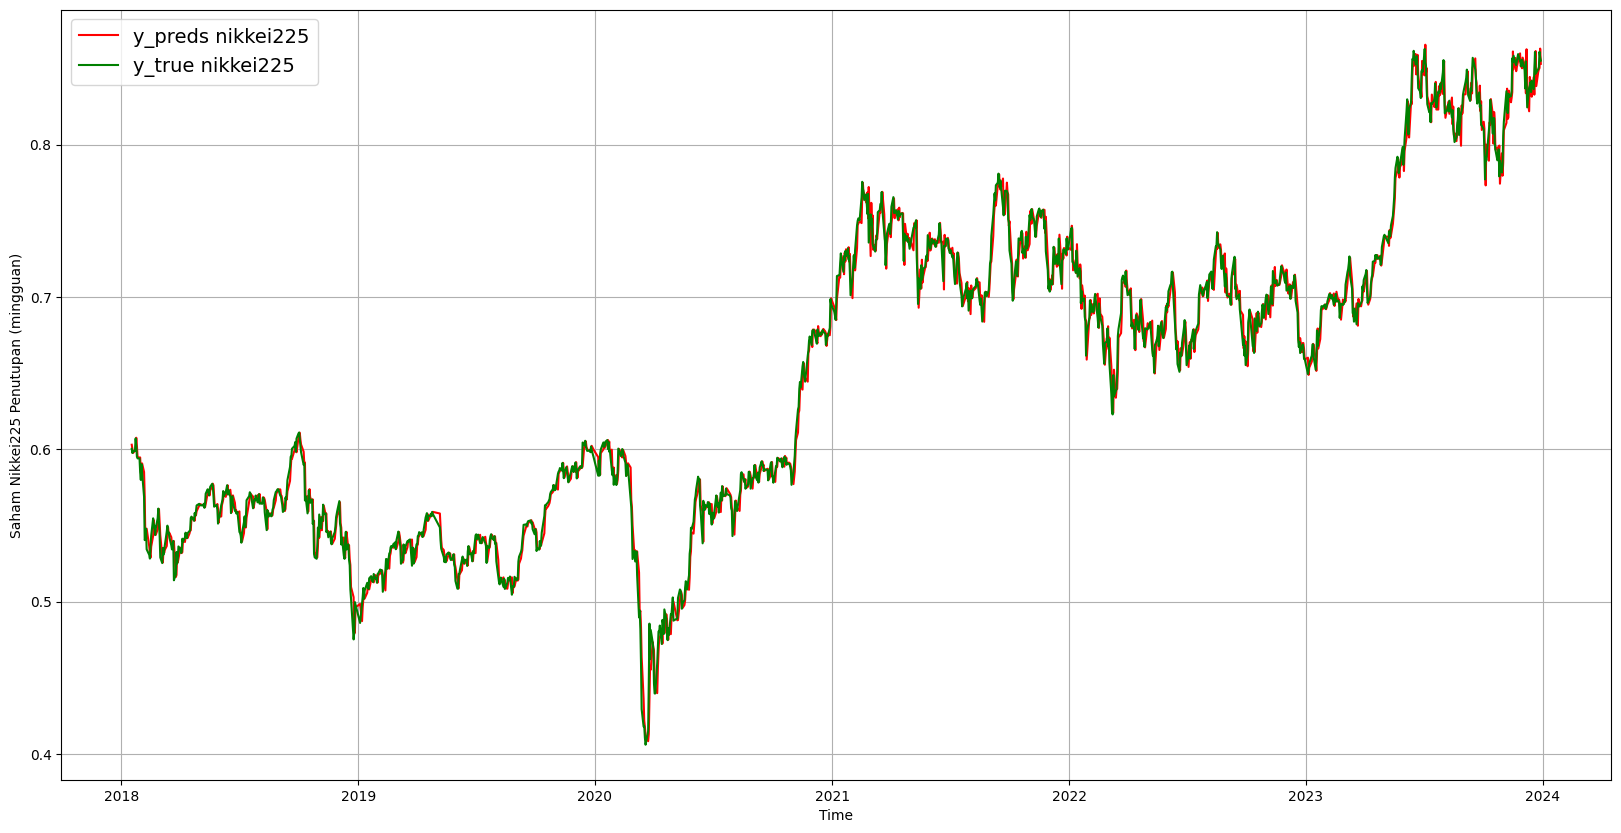

In [636]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_8_preds, format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_nikkeiLabels, format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/visualisasi_prediksi_time_series/model_8_plot_prediksi_stackedLSTM_uni.png')


simpan model trained ke bentuk .h5

In [637]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_8, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_8_stackedLSTM_univariate.h5")


<ipython-input-637-e4bb37d95791>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_8, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_8_stackedLSTM_univariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_8 = load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_8_stackedLSTM_univariate.h5")


# Model 9: Bidirectional LSTM Univariate

In [ ]:
train_nikkeiWindows.shape

(13165, 7)

In [ ]:
test_nikkeiLabels.shape

(1456,)

## Tuner Builder

In [ ]:
def model_bidirectional_LSTM_uni_builder(hp):

  tf.random.set_seed(42)
  model_9 = tf.keras.models.Sequential([
          #tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
          tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), # ini lambda layer sumberny dari bangkit C4W3 lab1
                        input_shape=[WINDOW_SIZE]),

          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = hp.Int('bi_lstm_n_units', min_value=32, max_value=256, step=32),
                                                             input_shape=(WINDOW_SIZE, 1),
                                                             return_sequences = False,
                                                             activation = "relu")),
          #tf.keras.layers.Dropout(0.2, seed=42),
          #tf.keras.layers.LSTM(128, return_sequences = False, activation = "relu"),

          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(1)
          ], name = "model_9_bidirectionalLSTM_univariate")


  #compile model 2
  model_9.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_9

In [ ]:
import keras_tuner as kt

tuner_bi_LSTM_uni = kt.Hyperband(model_bidirectional_LSTM_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs',
                     project_name='bi_LSTM_univariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/bi_LSTM_univariate/tuner0.json


## Proses tuning


In [ ]:
tuner_bi_LSTM_uni.search(train_nikkeiWindows,
                         train_nikkeiLabels,
                         epochs=10,
                         validation_data=(test_nikkeiWindows, test_nikkeiLabels),
                         batch_size = 128)

## Hasil parameter tuning terbaik

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_bi_LSTM_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ["bi_lstm_n_units", 'learning_rate']
print('Best tune model bidirectional LSTM univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model bidirectional LSTM univariate:
bi_lstm_n_units: 128
learning_rate: 0.01


## Hasil parameter tuning 10 terbaik

In [ ]:
tuning = ["bi_lstm_n_units", 'learning_rate']
top10_hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

top10_hps=tuner_bi_LSTM_uni.get_best_hyperparameters(num_trials=10)
for hps in top10_hps:
  for t in tuning:
    top10_hps_dict[t].append(hps.get(t))

df_top10 = pd.DataFrame(top10_hps_dict)
df_top10.to_csv('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/best_hyperparameter_models/hp_top10_bi_LSTM_uni.csv')
df_top10


bi_lstm_n_units  learning_rate
0              128          0.010
1              128          0.010
2              224          0.001
3              224          0.010
4               64          0.001
5               96          0.001
6              128          0.001
7               32          0.001
8              128          0.010
9              224          0.001

In [ ]:
tuner_bi_LSTM_uni.results_summary(num_trials=10)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/bi_LSTM_univariate
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0016 summary
Hyperparameters:
bi_lstm_n_units: 128
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.00668127927929163

Trial 0012 summary
Hyperparameters:
bi_lstm_n_units: 128
learning_rate: 0.01
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0011
Score: 0.006973716430366039

Trial 0017 summary
Hyperparameters:
bi_lstm_n_units: 224
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0015
Score: 0.00710502453148365

Trial 0029 summary
Hyperparameters:
bi_lstm_n_units: 224
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.007352821994572878

Trial 0024 summary
Hyperparameters:
bi_lstm_n_un

## Mengimplementasikan hyperparameter terbaik ke model

In [638]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_9 = tuner_bi_LSTM_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_9 = load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_9_bidirectionalLSTM_univariate.h5")


In [639]:

# fit
history = model_9.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_9.name)])

Epoch 1/50
102/103 [============================>.] - ETA: 0s - loss: 0.0242
Epoch 1: val_loss improved from inf to 0.00997, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_9_bidirectionalLSTM_univariate
103/103 [==============================] - 9s 61ms/step - loss: 0.0241 - val_loss: 0.0100
Epoch 2/50
 99/103 [===========================>..] - ETA: 0s - loss: 0.0071
Epoch 2: val_loss improved from 0.00997 to 0.00962, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_9_bidirectionalLSTM_univariate
103/103 [==============================] - 6s 54ms/step - loss: 0.0070 - val_loss: 0.0096
Epoch 3/50
101/103 [============================>.] - ETA: 0s - loss: 0.0066
Epoch 3: val_loss did not improve from 0.00962
103/103 [==============================] - 2s 16ms/step - loss: 0.0066 - val_loss: 0.0102
Epoch 4/50
100/103 [============================>.] - ETA: 0s - loss: 0.0066
Epoch 4: val_loss improved fr

visualisasi model shape

In [640]:
model_9.summary()

Model: "model_9_bidirectionalLSTM_univariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 7, 1)              0         
                                                                 
 bidirectional_4 (Bidirecti  (None, 64)                8704      
 onal)                                                           
                                                                 
 dense_28 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8769 (34.25 KB)
Trainable params: 8769 (34.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


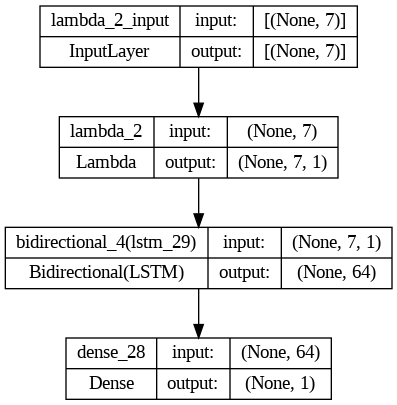

In [641]:
from tensorflow.keras.utils import plot_model

plot_model(model_9, to_file='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_plot/model_biLSTM_uni_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

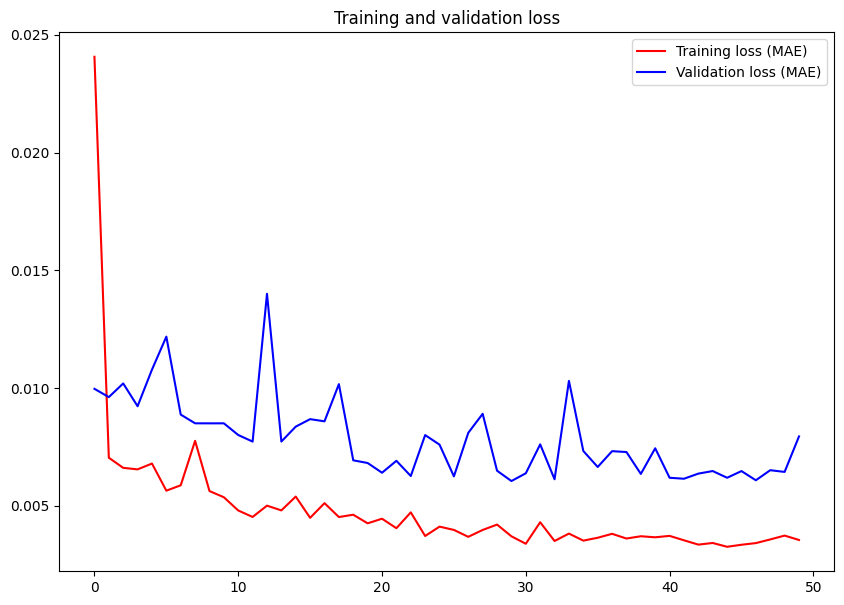

In [642]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.legend(loc=0)


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_loss_visualization/loss_bidirectional_LSTM_uni.png')


In [643]:
# mengevaluasi model 6 dari epochs terakhir
model_9.evaluate(test_nikkeiWindows, test_nikkeiLabels)

46/46 [==============================] - 0s 3ms/step - loss: 0.0079


0.007948709651827812

In [644]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_9 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_9_bidirectionalLSTM_univariate")
model_9.evaluate(test_nikkeiWindows, test_nikkeiLabels)


46/46 [==============================] - 1s 4ms/step - loss: 0.0061


0.006055182311683893

In [645]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_9_preds = tf.squeeze(model_9.predict(test_nikkeiWindows))
model_9_preds



46/46 [==============================] - 1s 4ms/step


<tf.Tensor: shape=(1456,), dtype=float32, numpy=
array([0.602905  , 0.60050696, 0.5976829 , ..., 0.8508024 , 0.8618353 ,
       0.8559719 ], dtype=float32)>

In [646]:
model_9_preds[:2]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.602905  , 0.60050696], dtype=float32)>

In [647]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_9_results = evaluate_preds(y_true = test_nikkeiLabels,
                                 y_pred = model_9_preds)

model_9_results

{'mae': 0.0060551832,
 'mse': 6.632452e-05,
 'rmse': 0.008143987,
 'R-square': 0.9936259428179139}

In [648]:
tf.squeeze(test_nikkeiLabels[:])

<tf.Tensor: shape=(1456,), dtype=float64, numpy=
array([0.60032696, 0.59753888, 0.59872588, ..., 0.86096453, 0.857203  ,
       0.85519899])>

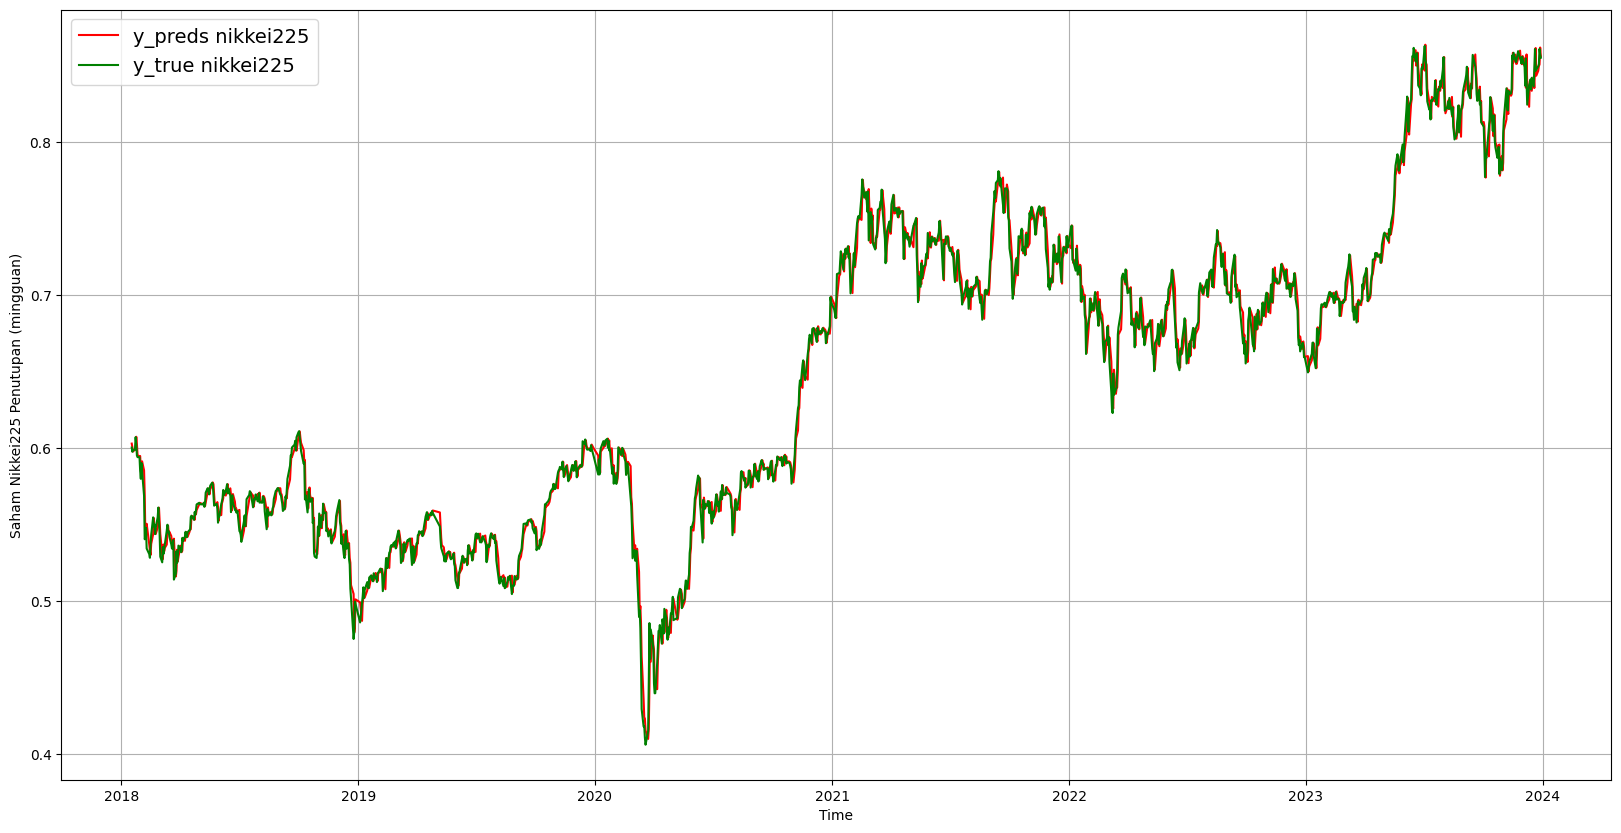

In [649]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_9_preds, format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_nikkeiLabels, format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/visualisasi_prediksi_time_series/model_9_plot_prediksi_biLSTM_uni.png')


simpan model trained ke bentuk .h5

In [650]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_9, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_9_bidirectionalLSTM_univariate.h5")



<ipython-input-650-73e448de2170>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_9, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_9_bidirectionalLSTM_univariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_9 = load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_9_bidirectionalLSTM_univariate.h5")


# Model 10: CNN-LSTM Univariate

## Tuner Builder

In [ ]:
#create Conv1D model
def model_CNN_LSTM_uni_builder(hp):
  tf.random.set_seed(42)
  model_10 = tf.keras.models.Sequential([
      #layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
      tf.keras.layers.Conv1D(filters=hp.Int('Conv1D_n_filters', min_value=32, max_value=256, step=32),
                             kernel_size=hp.Int('Conv1_kernel_size', min_value=5, max_value=10, step=1),
                             strides=1,
                             padding="causal",
                             activation="relu",
                             input_shape=[WINDOW_SIZE, 1]),

      tf.keras.layers.LSTM(units = hp.Int('LSTM_n_units', min_value=32, max_value=256, step=32),
                           return_sequences=False),

      tf.keras.layers.Dense(1),
      #filters adalah jumlah hidden unit dalam layers tersebut
      # kernel size adalah ukuran dari window. Ex: kernel_size = 7 artinya melihat 7 value sekaligus
      # default nilai strides = 1, ini sudah sesuai karena sliding window bergeser satu timesteps
  ], name = "model_10_CNN-LSTM_univariate")

  #compile model 10
  model_10.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_10

In [ ]:
import keras_tuner as kt

tuner_CNN_LSTM_uni = kt.Hyperband(model_CNN_LSTM_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs',
                     project_name='CNN_LSTM_univariate')


Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/CNN_LSTM_univariate/tuner0.json


## Proses tuning


In [ ]:
tuner_CNN_LSTM_uni.search(train_nikkeiWindows,
                          train_nikkeiLabels,
                          epochs=10,
                          validation_data=(test_nikkeiWindows, test_nikkeiLabels),
                          batch_size = 128)

## Hasil parameter tuning terbaik

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_CNN_LSTM_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ['Conv1D_n_filters', 'Conv1_kernel_size', "LSTM_n_units", 'learning_rate']
print('Best tune model bidirectional LSTM univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model bidirectional LSTM univariate:
Conv1D_n_filters: 256
Conv1_kernel_size: 6
LSTM_n_units: 64
learning_rate: 0.01


## Hasil parameter tuning 10 terbaik

In [ ]:
tuning = ['Conv1D_n_filters', 'Conv1_kernel_size', "LSTM_n_units", 'learning_rate']
top10_hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

top10_hps=tuner_CNN_LSTM_uni.get_best_hyperparameters(num_trials=10)
for hps in top10_hps:
  for t in tuning:
    top10_hps_dict[t].append(hps.get(t))

df_top10 = pd.DataFrame(top10_hps_dict)
df_top10.to_csv('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/best_hyperparameter_models/hp_top10_CNN_LSTM_uni.csv')
df_top10



Conv1D_n_filters  Conv1_kernel_size  LSTM_n_units  learning_rate
0               256                  6            64          0.010
1                96                  8           160          0.010
2               256                 10           160          0.001
3               128                  5           224          0.001
4               256                 10            64          0.001
5               192                  6           256          0.001
6               160                  7           160          0.010
7               128                  5           224          0.001
8               160                 10           160          0.001
9               160                  7           160          0.010

In [ ]:
tuner_CNN_LSTM_uni.results_summary(num_trials=10)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/CNN_LSTM_univariate
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0028 summary
Hyperparameters:
Conv1D_n_filters: 256
Conv1_kernel_size: 6
LSTM_n_units: 64
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.008100083097815514

Trial 0027 summary
Hyperparameters:
Conv1D_n_filters: 96
Conv1_kernel_size: 8
LSTM_n_units: 160
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.008332242257893085

Trial 0026 summary
Hyperparameters:
Conv1D_n_filters: 256
Conv1_kernel_size: 10
LSTM_n_units: 160
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.008521581999957561

Trial 0024 summary
Hyperparameters:
Conv1D_n_filters: 128
Conv1_kernel_size: 5
LSTM_n_units: 224
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/br

## Mengimplementasikan hyperparameter terbaik ke model

In [651]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_10 = tuner_CNN_LSTM_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_10 = load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_10_CNN-LSTM_univariate.h5")



In [652]:

# fit
history = model_10.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_10.name)])

Epoch 1/50
101/103 [============================>.] - ETA: 0s - loss: 0.0228
Epoch 1: val_loss improved from inf to 0.01975, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_10_CNN-LSTM_univariate
103/103 [==============================] - 9s 65ms/step - loss: 0.0225 - val_loss: 0.0197
Epoch 2/50
103/103 [==============================] - ETA: 0s - loss: 0.0111
Epoch 2: val_loss improved from 0.01975 to 0.01159, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_10_CNN-LSTM_univariate
103/103 [==============================] - 7s 72ms/step - loss: 0.0111 - val_loss: 0.0116
Epoch 3/50
103/103 [==============================] - ETA: 0s - loss: 0.0092
Epoch 3: val_loss did not improve from 0.01159
103/103 [==============================] - 3s 24ms/step - loss: 0.0092 - val_loss: 0.0178
Epoch 4/50
103/103 [==============================] - ETA: 0s - loss: 0.0082
Epoch 4: val_loss did not improve from 0.0115

visualisasi model shape

In [653]:
model_10.summary()

Model: "model_10_CNN-LSTM_univariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 7, 256)            1792      
                                                                 
 lstm_30 (LSTM)              (None, 64)                82176     
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                                 
Total params: 84033 (328.25 KB)
Trainable params: 84033 (328.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


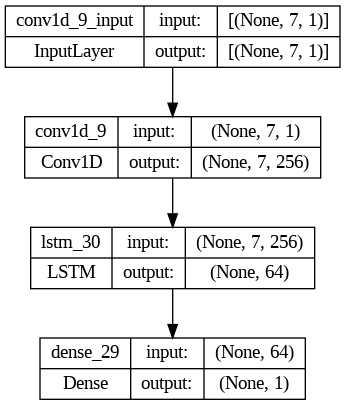

In [654]:
from tensorflow.keras.utils import plot_model

plot_model(model_10, to_file='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_plot/model_CNN-LSTM_uni_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

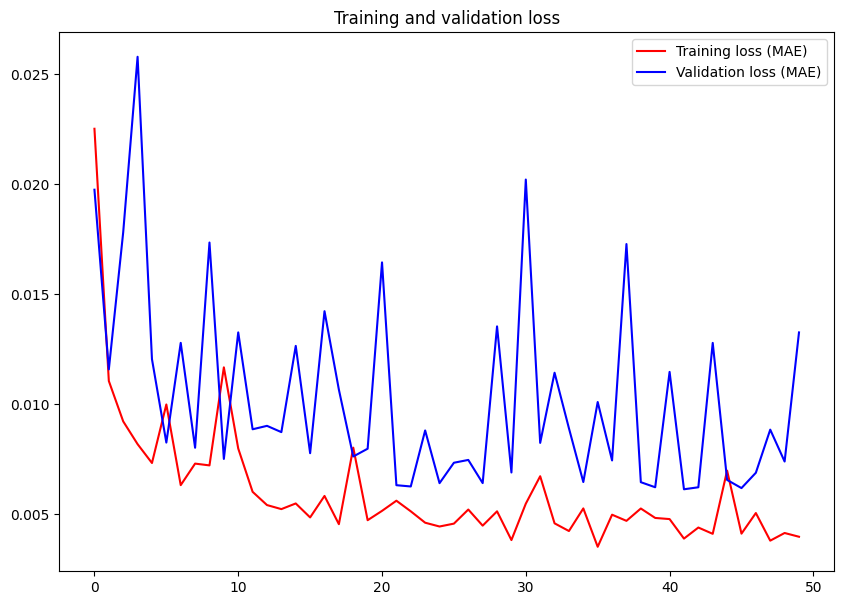

In [655]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.legend(loc=0)



# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_loss_visualization/loss_CNN-LSTM_uni.png')



In [656]:
# mengevaluasi model 6 dari epochs terakhir
model_10.evaluate(test_nikkeiWindows, test_nikkeiLabels)

46/46 [==============================] - 0s 8ms/step - loss: 0.0133


0.013266023248434067

In [657]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_10= tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_10_CNN-LSTM_univariate")
model_10.evaluate(test_nikkeiWindows, test_nikkeiLabels)


46/46 [==============================] - 1s 4ms/step - loss: 0.0061


0.0061403862200677395

In [658]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_10_preds = tf.squeeze(model_10.predict(test_nikkeiWindows))
model_10_preds



46/46 [==============================] - 1s 4ms/step


<tf.Tensor: shape=(1456,), dtype=float32, numpy=
array([0.6034085 , 0.60097176, 0.59882283, ..., 0.85176116, 0.8603579 ,
       0.8570243 ], dtype=float32)>

In [659]:
model_10_preds[:2]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.6034085 , 0.60097176], dtype=float32)>

In [660]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_10_results = evaluate_preds(y_true = test_nikkeiLabels,
                                 y_pred = model_10_preds)

model_10_results

{'mae': 0.0061403853,
 'mse': 6.8615045e-05,
 'rmse': 0.00828342,
 'R-square': 0.9934058151695714}

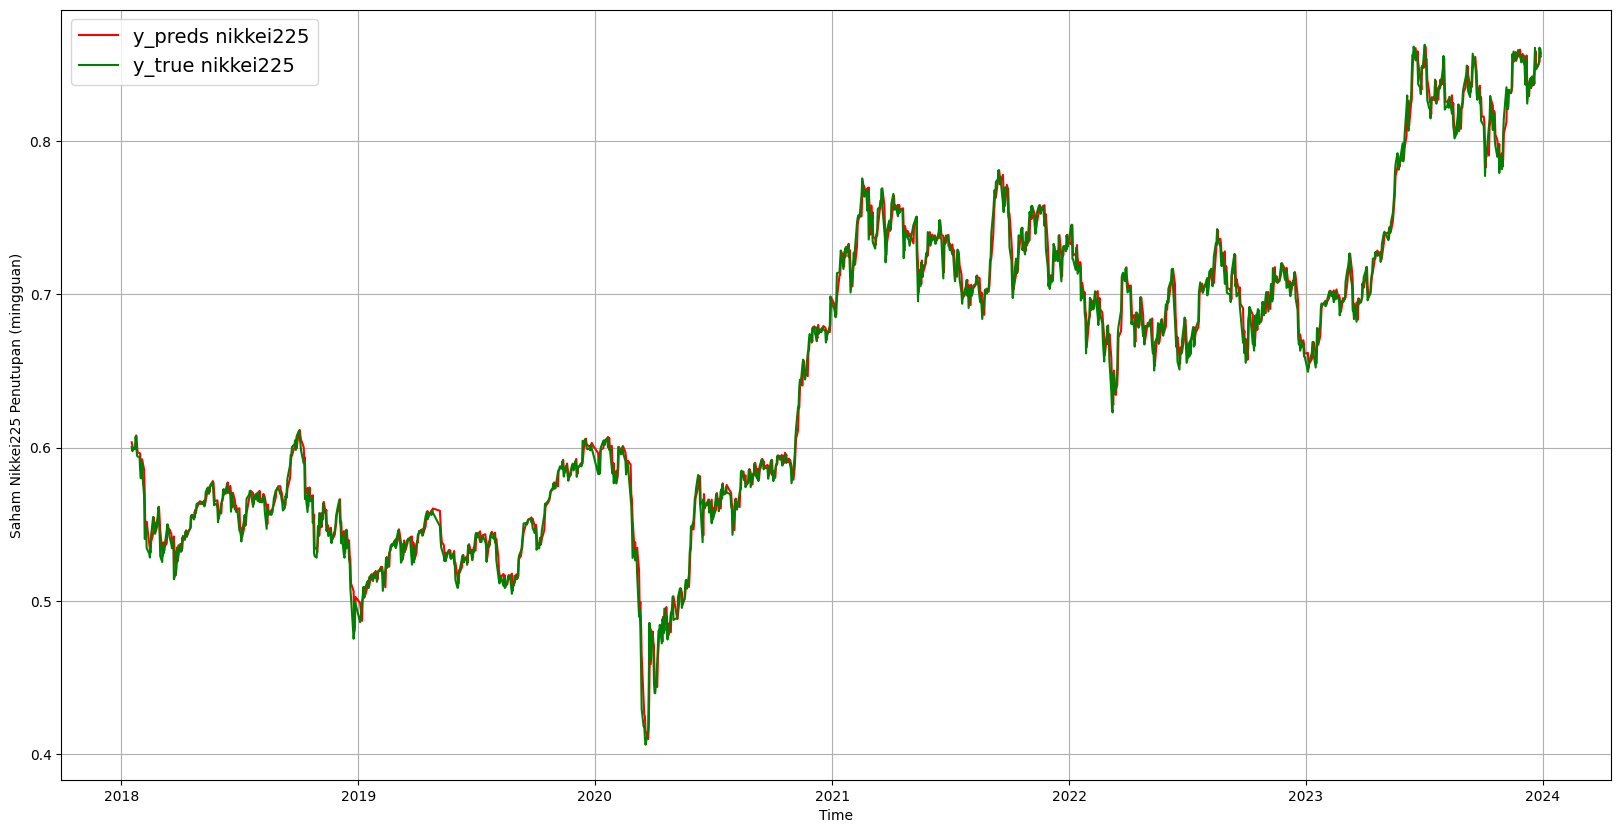

In [661]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_10_preds, format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_nikkeiLabels, format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/visualisasi_prediksi_time_series/model_10_plot_prediksi_CNN-LSTM_uni.png')


simpan model trained ke bentik .h5

In [662]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_10, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_10_CNN-LSTM_univariate.h5")



<ipython-input-662-625279d4b6e0>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_10, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_10_CNN-LSTM_univariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_10 = load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_10_CNN-LSTM_univariate.h5")



# visualisasi hasil evaluasi metrik

<Axes: >

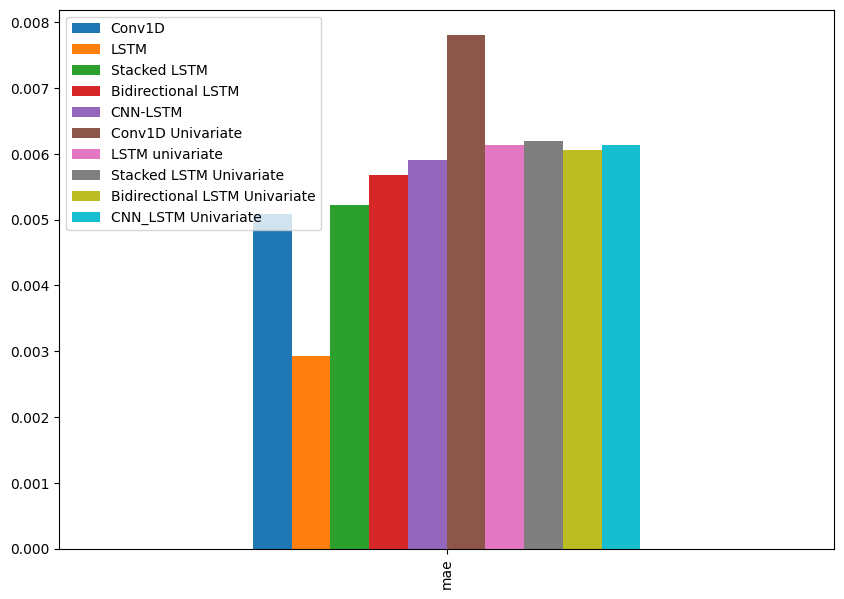

In [686]:
pd.DataFrame({
              "Conv1D": model_1_results["mae"],
              "LSTM": model_2_results["mae"],
              "Stacked LSTM" : model_3_results["mae"],
              "Bidirectional LSTM" : model_4_results["mae"],
              "CNN-LSTM": model_5_results["mae"],
              "Conv1D Univariate" : model_6_results["mae"],
              "LSTM univariate" : model_7_results["mae"],
              "Stacked LSTM Univariate" : model_8_results["mae"],
              "Bidirectional LSTM Univariate" : model_9_results["mae"],
              "CNN_LSTM Univariate" : model_10_results["mae"]},
             index = ["mae"]).plot(figsize = (10,7), kind = "bar")

<Axes: >

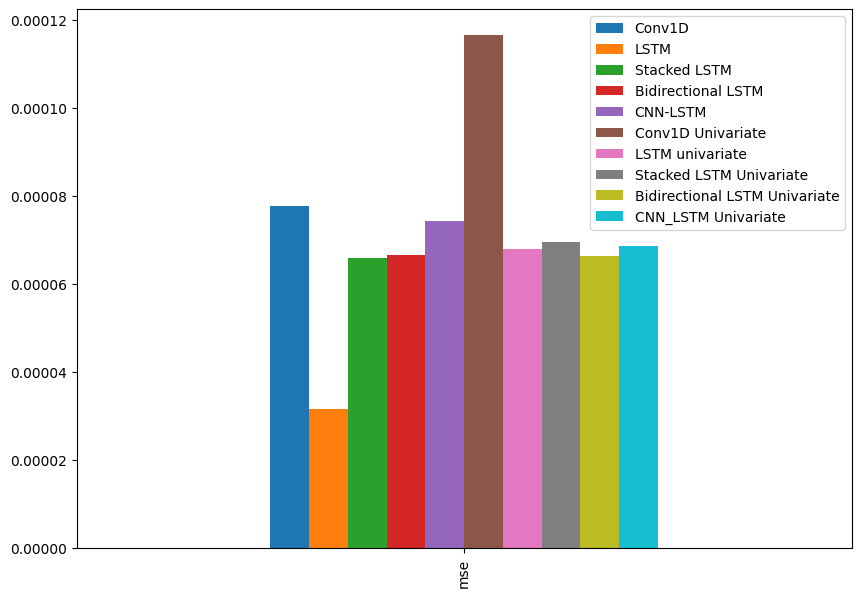

In [687]:
pd.DataFrame({
              "Conv1D": model_1_results["mse"],
              "LSTM": model_2_results["mse"],
              "Stacked LSTM" : model_3_results["mse"],
              "Bidirectional LSTM" : model_4_results["mse"],
              "CNN-LSTM": model_5_results["mse"],
              "Conv1D Univariate" : model_6_results["mse"],
              "LSTM univariate" : model_7_results["mse"],
              "Stacked LSTM Univariate" : model_8_results["mse"],
              "Bidirectional LSTM Univariate" : model_9_results["mse"],
              "CNN_LSTM Univariate" : model_10_results["mse"]},
             index = ["mse"]).plot(figsize = (10,7), kind = "bar")

<Axes: >

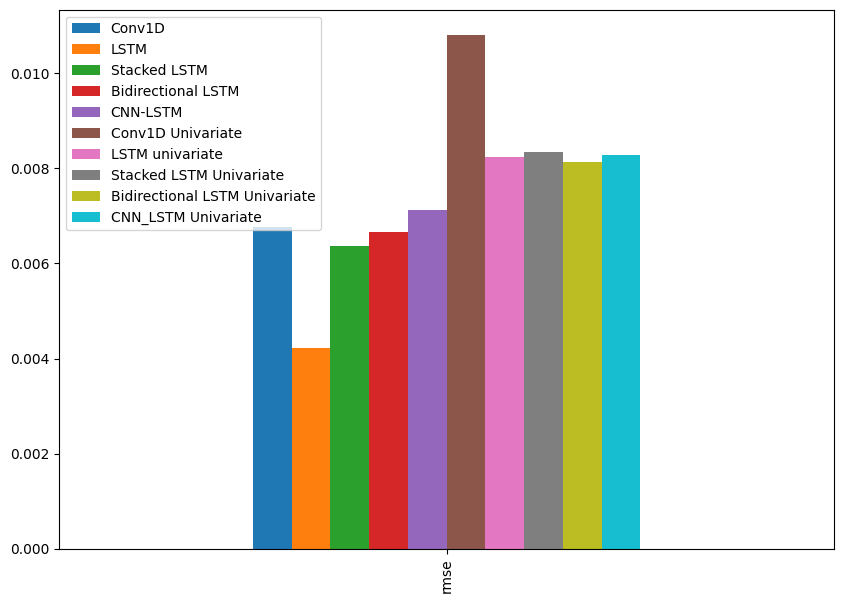

In [688]:
pd.DataFrame({
              "Conv1D": model_1_results["rmse"],
              "LSTM": model_2_results["rmse"],
              "Stacked LSTM" : model_3_results["rmse"],
              "Bidirectional LSTM" : model_4_results["rmse"],
              "CNN-LSTM": model_5_results["rmse"],
              "Conv1D Univariate" : model_6_results["rmse"],
              "LSTM univariate" : model_7_results["rmse"],
              "Stacked LSTM Univariate" : model_8_results["rmse"],
              "Bidirectional LSTM Univariate" : model_9_results["rmse"],
              "CNN_LSTM Univariate" : model_10_results["rmse"]},
             index = ["rmse"]).plot(figsize = (10,7), kind = "bar")

In [675]:
model_4_results

{'mae': 0.0061786203,
 'mse': 6.8594374e-05,
 'rmse': 0.0082821725,
 'R-square': 0.9934078018805989}

In [676]:
model_7_results

{'mae': 0.006136411,
 'mse': 6.7916495e-05,
 'rmse': 0.008241147,
 'R-square': 0.9934729482533422}

In [677]:
model_8_results

{'mae': 0.0061877947,
 'mse': 6.955699e-05,
 'rmse': 0.008340083,
 'R-square': 0.9933152903940595}

In [678]:
model_9_results

{'mae': 0.0060551832,
 'mse': 6.632452e-05,
 'rmse': 0.008143987,
 'R-square': 0.9936259428179139}

In [679]:
model_10_results

{'mae': 0.0061403853,
 'mse': 6.8615045e-05,
 'rmse': 0.00828342,
 'R-square': 0.9934058151695714}

<Axes: >

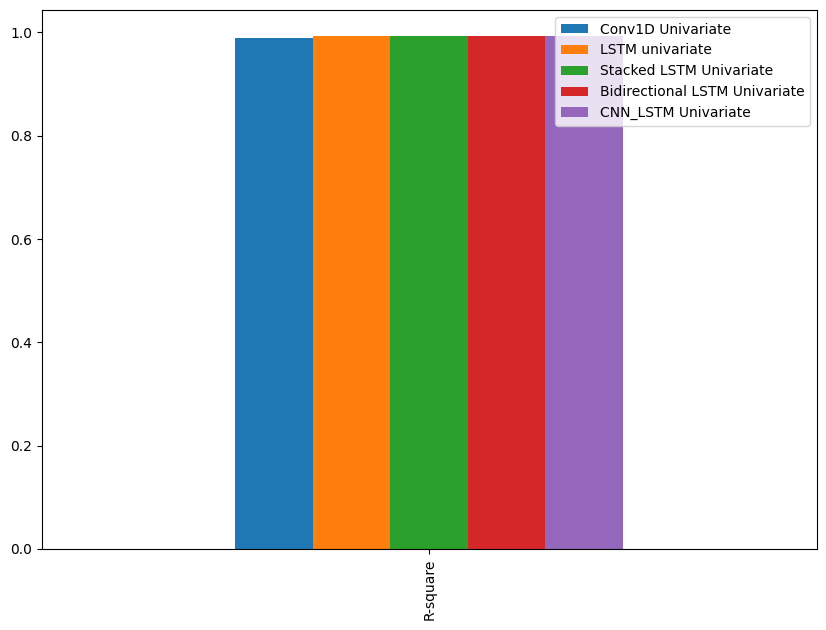

In [693]:
# NOTE : Perhitungan Rsquare untuk yang multivariate masih error
pd.DataFrame({
              "Conv1D": model_1_results["R-square"],
              "LSTM": model_2_results["R-square"],
              "Stacked LSTM" : model_3_results["R-square"],
              "Bidirectional LSTM" : model_4_results["R-square"],
              "CNN-LSTM": model_5_results["R-square"],
              "Conv1D Univariate" : model_6_results["R-square"],
              "LSTM univariate" : model_7_results["R-square"],
              "Stacked LSTM Univariate" : model_8_results["R-square"],
              "Bidirectional LSTM Univariate" : model_9_results["R-square"],
              "CNN_LSTM Univariate" : model_10_results["R-square"]},
             index = ["R-square"]).plot(figsize = (10,7), kind = "bar")